# Experiment 1: Muon Flux
### Janie Holzmann 41456161

**2021-01-18, 3:00 pm**

## Project Plan

### Objective: to measure the incoming flux of muons on Earth at sea level, and the dependence of the flux on the angular orientation of the detectors.

#### Methods
In this experiment, we will need to first create an apparatus to detect the muons. This can be done with scintillators, which light up when a muon is detected. We will use two large paddle scintillators that are about 1 m apart. The signal from a cosmic muon is quite weak, so we will also use photomultiplier tubes (PMTs, one for each scintillator) to amplify these signals before sending them into data acquisition. The detectors will also have the ability to rotate, so that we can examine how the muon flux varies with the angle of the detector. It is also important that we calculate the angluar range of our detector with uncertainty.

The signal that we detect is subject to noise, so we will use quad discriminators to reject any pulses from the PMT that are too low to be from muons ('too low' will be defined once we are able to actually detect some pulses and observe their strength). We will then further get rid of noise with quad coincidence modules. These are needed because most of the muons will not hit the detector in the middle, so the signals received from each of the PMTs will be offset (the PMT closer to where the muon hit will emit a signal before the further one). In order for a pulse to be considered a muon and not noise, the quad coincidence module requires that the PMTs both emit the signal within ~20 ns.

Since we are doing this experiment virtually, we will be performing a numerical simulation of the muons hitting the detector. We will need to understand the dependence that the flux has on the angle of the detector. We will also be using actual data that we can analyze and compare with simulation results.

#### Timeline
* Week 1 (Jan. 18): get familiarized with experimental procedure, apparatus (ensure we know how each part of the apparatus works, and why it is important), define goals/create plan - submit logbook Jan. 22
* Week 2 (Jan. 25): literature search - look for results that can be compared to results I obtain, get an idea of what to expect, make note of errors/uncertainty; start numerical simulations (want to simulate muons hitting detector) - submit logbook Jan. 29
* Week 3 (Feb. 1): continue numerical simulations: write code, perform simulations and record important results and observations, discuss any sources of error - submit logbook Feb. 5
* Week 4 (Feb. 8): process and analyze actual data, compare data to results from numerical simulations done in previous week. Discuss sources of error in data - submit logbook Feb. 12
* Week 5 (Feb. 15): write reduced paper and presentation. Want to discuss key results as well as error and methods, among other things - submit logbook Feb. 19
* Week 6 (Feb.22): wrap up, finish paper and presentation, make any final additions to logbook and submit Feb. 26

**2021-01-19, 11:30am**

## Updates To Project Plan

After reading the full manual for the Muon Flux experiment, the goal and timeline of the experiment will be changed slightly:

### Goal: to study the cosmic muon flux on Earth by performing simluations of muons of varying momentum hitting a detector, in order to estimate the momentum of muons that we detect on Earth.

The intensity of muons hitting Earth can be described by the following equation:
$$I(\theta)=I_0\cos^n(\theta),$$
where $I_0$ is the initial intensity at $\theta=0$, and $n$ is a number that depends on the momentum of the muon.

#### Timeline:

The main changes here are that the simulations will be started sooner.

* Week 1 (Jan. 18): get familiarized with experimental procedure, apparatus (ensure we know how each part of the apparatus works, and why it is important), define goals/create plan, begin writing code for simulations (focus on muon lifetime and path length) - submit logbook Jan. 22
* Week 2 (Jan. 25): literature search - look for results that can be compared to results I obtain, get an idea of what to expect, make note of errors/uncertainty; finish muon lifetime/path length and start muon momenta and attenuation  - submit logbook Jan. 29
* Week 3 (Feb. 1): continue numerical simulations (momenta and attenuation): record important results and observations, discuss any sources of error - submit logbook Feb. 5
* Week 4 (Feb. 8): finsh up simulations, process and analyze actual data, compare data to results from simulations (analyze momenta). Discuss sources of error in data - submit logbook Feb. 12
* Week 5 (Feb. 15): write reduced paper and presentation. Want to discuss key results as well as error and methods, among other things - submit logbook Feb. 19
* Week 6 (Feb.22): wrap up, finish paper and presentation, make any final additions to logbook and submit Feb. 26

**2021-01-20, 1:30pm**
## Plan for the Day
In this lab session, we will be starting the first simulation on muon lifetime. In particular, we want to determine how long a specific muon will live before it decays, and do this for thousands of muons.

## Muon Lifetime
### Background Information and Theory
Muons are unstable, and they decay with a lifetime of $~2.2\mu$s. The decay of muons follow a Poissonian probability distribution: $$P(N|t)=\frac{(rt)^Ne^{-rt}}{N!},$$ where $N$ is the number of events, $t$ is the time interval, and $r$ is tha rate at which the events occur. The events in a Poissionian process are independent of each other, and the rate of the process happening is constant in time. In the case of decaying muons, this means that a muon decaying or not decaying in one time interval has no effect on whether or not it will decay in the next interval. A muon that has lived for 5 minutes and a muon that has lived for 1 $\mu$s have the same probability of decaying in one time interval. Also, the probability of a given muon decaying in each time interval (of the same length) is the same, but the probability of this muon decaying in, say, 3 time intervals is higher.

The decay rate $\lambda$ of the muons is the inverse of their lifetime, i.e., $$\lambda=\frac{1}{\tau}$$
For a lifetime of $2.2\mu$s, we get $\lambda=4.545\times 10^{5} s^{-1}$.

### Implementing Code 
To simulate the lifetime of a muon, we can generate random numbers from a Poissionian distribution and compare these to the known decay rate of the muons. We will use `numpy.random.poisson(decayConstant, a number)` to achieve this. We will end up with an array of a number of integers drawn from the Poissonian distribution (this number corresponds to the number of iterations) and an expectation value of $rt = \lambda$.

We can then determine if a muon decays in a given time interval, based on if the random number is greater than $rt$ (muon decays within time interval), or less then $rt$ (muon does not decay).

In our simulations, we will need to determine how many time intervals that a given muon can survive before it decays, and how long a given muon lives before it decays, for many thousands of muons. With these results, we can fit to a function; we expect to get back the known lifetime of $2.2\mu$s.

After this (in next lab session), we can perform Monte Carlo simulations to examine how far a muon can travel through the Earth's atmosphere before it decays, without then with time dilation being considered (assuming $v_{muon}=0.95$c).

### Questions
1. What is the different between the rate of events $r$ in the equation for a Poissonian distribution, and the decay rate of the muon, $\lambda$? How does $rt=\lambda$?
2. What is meant by `number` in the small code block? Is this something we need to change in order to account for thousands of muons?
3. How do we check over multiple time intervals to see if a muon has decayed or not?

[1 0 1 1 0 2 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 2 0 1 0 0 0 1 1
 0 0 1 2 0 1 0 1 0 2 0 0 1]


(array([28.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

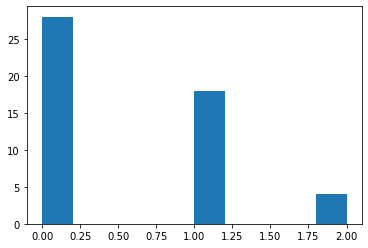

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# code to determine if 1 muon has decayed in time interval of 1 us
# (from manual):
decayConstant = 1/2.2 # units of (us)^-1

number = 50  # number of iterations to pull from Poissonian
a = np.random.poisson(decayConstant, number)  # draw from distribution
# and place into array a
print(a)
plt.hist(a)



An important thing to note in the above code block is that the `numpy.random.poisson` function outputs integers only. Each of these numbers represents the number of decays in the specified time interval (1 $\mu$s in this case). It doesn't really make sense to have, for example, 1.5 decays in 1 $\mu$s, because we can't have half an event occur; the muon either decays or does not decay.

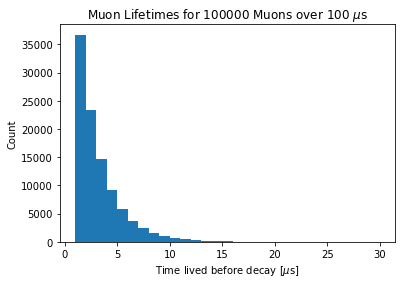

In [1]:
import numpy as np
import matplotlib.pyplot as plt

decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
max_time = 100
number_muons = 100000

time_to_decay = []
for i in range(1, number_muons+1):  # do for many thousand muons
    for j in range(1, max_time+1):  # check over many time intervals of length 1 us
        a = np.random.poisson(decayConstant, number)

        if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
            time_to_decay.append(j)
            break
        if a < decayConstant:  # muon has not yet decayed
            pass


plt.figure(1)
plt.xlabel(r'Time lived before decay [$\mu$s]')
plt.ylabel('Count')
plt.title('Muon Lifetimes for {} Muons over {} $\mu$s'.format(number_muons, max_time))
n1, bins1, patches1 = plt.hist(time_to_decay, 
                            bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

            

**2021-01-22, 12:00pm**

## Plan For the Day

In this session we will be continuing the simulation of the muon lifetime. We will be taking the simulated data from the previous session and fitting it to a function to get back the decay constant, $\lambda = \frac{1}{\tau}$, where $\tau = 2.2\mu$s.

### Fitting Function and Analogy to Radioactive Decay

The plot from two days ago clearly looks like exponential decay. Thus, we will try fitting it to an exponential function.

In radioactive decay, the number of nuclei in a sample that have not decaed is given by: $$N(t)=N_0e^{-\lambda t},$$ where $\lambda = \frac{\ln(2)}{t_{1/2}}$, and $t_{1/2}$ is the half-life of an isotope. We can use a very similar equation here, but $N(t)$ will be the number of muons that have not yet decayed after a certain amount of time $t$.

By fitting the simulated data to this exponential decay function, we will be able to determine the decay constant and thus get back the average lifetime of a muon.

muon lifetime: [1.26928577] microseconds


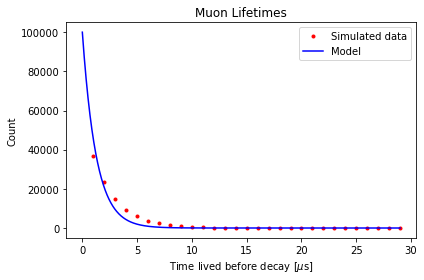

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# fitting simulated data to function to determine the muon lifetime:

def expDecay(t, lamb):
    return number_muons*np.exp(-lamb*t)

max_time2 = range(1, bins1[-1])  # updating time array to only go up to times that have a decayed muon
found_decayConstant, pcov = curve_fit(expDecay, max_time2, n1,p0=1/2.2)

tau = 1/found_decayConstant  # muon lifetime
print('muon lifetime: {} microseconds'.format(tau))

plt.title('Muon Lifetimes')
plt.xlabel(r'Time lived before decay [$\mu$s]')
plt.ylabel('Count')
plt.plot(max_time2, n1, 'r.',label='Simulated data')
plt.plot(np.linspace(0, max_time2[-1], 1000), expDecay(np.linspace(0, max_time2[-1], 1000),
                                                                  found_decayConstant), 'b-',label='Model')
plt.legend()
plt.tight_layout()

We get a muon lifetime of $1.27\mu$s. This is off from the expected value of $2.2\mu$s by a factor of about 1.73. This number could be improved, but it is on the same order of magnitude as the expected value, which is good. This number will be discussed more on Monday to compare with others, and to discuss ways to improve it.

### Determining how far Muons Travel Before they Decay

Now that we have an estimate of the lifetime of the muons, we can use this to determine how far these muons actually travel before they decay. The goal of this is to see if a muon will reach the Earth's surface (and thus hit the detectors) before decaying. We will assume that the speed of these muons in 95% the speed of light, and we will first do this without taking into account relativity, and then with taking into account relativity. We will also assume that Earth's atmosphere extends 15km up, i.e., the muons will be produced at a height of 15km above the surface.

#### Classical Approach

For the classical approach, we can use the information about when a muon decays and the speed of the muon to see how far it travelled before decaying: $$d = (\text{muon speed})(\text{time lived before decaying})$$

100000
[ 285.  570. 1140. ...  855.  855.  855.]


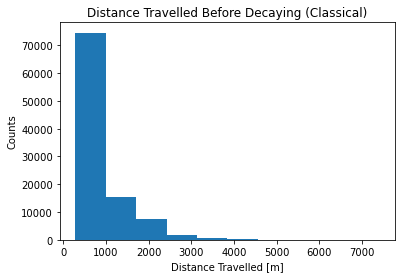

In [3]:
# determine how far muons travel before decaying (classical)
# we will be needing: time_to_decay
c = 300  # speed of light in metres per microsecond
v = 0.95*c

time_to_decay = np.array(time_to_decay)
print(len(time_to_decay))
distanceTravelled = v*time_to_decay
print(distanceTravelled)
plt.title('Distance Travelled Before Decaying (Classical)')
plt.xlabel('Distance Travelled [m]')
plt.ylabel('Counts')
n2, bins2, patches = plt.hist(distanceTravelled)

We see above that the furthest the muons are able travel before decaying is around 5000m, but the distance that they need to travel is at least 15000m in order to reach the surface of the Earth. This implies that we do need to take into account the effects of relativity.

#### Relativistic Approach

To do this, we will take into effect length contraction. In the reference fram of the muon, the distance from the top of the atmosphere to the surface of the Earth will not be 15000m; it will be shortened by a factor of $$\gamma=\frac{1}{\sqrt{1-v^2/c^2}}=\frac{1}{\sqrt{1-0.95^2}}=3.2026$$

Thus, the distance that the muon sees itself as travelling is: $$d'=\frac{d}{\gamma}=\frac{15\text{km}}{3.2026}=4.6837\text{km}.$$

If we assume that the above plot was in the frame of reference of the muon, we can multiply those distances by the $\gamma$ factor to get the distance travelled by the muon in the frame of someone on Earth (assumed to be stationary).

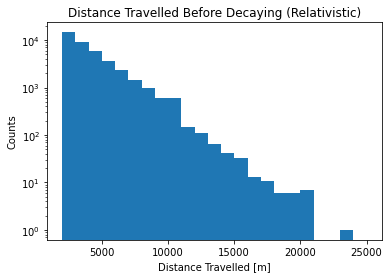

In [4]:
# determine how far muons travel before decaying (relativistic)
# we will be needing: time_to_decay
c = 300  # speed of light in metres per microsecond
v = 0.95*c
gamma = 1/np.sqrt(1-(v/c)**2)

time_to_decay = np.array(time_to_decay)
#print(time_to_decay)
distanceTravelled = v*time_to_decay
#print(distanceTravelled*gamma)
plt.title('Distance Travelled Before Decaying (Relativistic)')
plt.xlabel('Distance Travelled [m]')
plt.ylabel('Counts')
plt.yscale("log")
bins3 = [2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,
        18000,19000,20000,21000,22000,23000,24000,25000]
n3, bins3, patches = plt.hist(distanceTravelled*gamma,bins=bins3)


We see here that muons do indeed make it past 15000m, but most of them still decay before making it to the surface.

#### To discuss on Monday:

* Results of muon lifetime simulation: compare and discuss ways to improve, see if what I've done is different from what others have done
* Results of distance travelled simulations: ensure that my thinking is correct, compare results
* Plans for next week: finish up with muon lifetime, begin and finish muon path length simulation, begin muon momenta simulations (mid-late next week); also literature search
* Any questions I may have: is the relativistc approach done correctly?

**2021-01-24, 3:00pm**

## Updates

**Notes:** the assumed muon speed of $0.95$c and atmosphere height of 15km were taken from the lab manual for the muon flux experiment. Also, the reason the determined muon lifetime was off could be because in the analysis, the number of muons was kept constant. Here, we will redo that analysis but we will let the number of muons be a parameter in the function `expDecay` so that `scipy.optimize.curve_fit()` can determine the best-fit value.

range(1, 30)
[[7.80417906e-07 7.55448546e-02]
 [7.55448546e-02 1.02349640e+04]]
muon lifetime: 2.1803294684206374 +/- 3.709979198463929e-06 microseconds 
 number muons: 100000 +/- 10234.963972799766


<ipython-input-36-97b8cc86ff61>:8: RuntimeWarning: overflow encountered in exp
  return numb_muons*np.exp(-lamb*t)


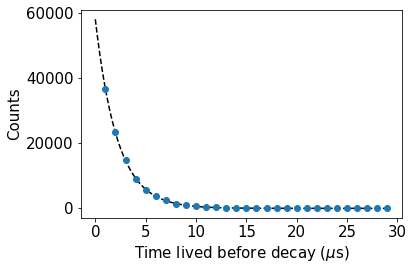

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# fitting simulated data to function to determine the muon lifetime:

def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)

max_time2 = range(1, bins1[-1])  # updating time array to only go up to times that have a decayed muon
print(max_time2)
fitparams, pcov = curve_fit(expDecay, max_time2, n1)
found_decayConstant = fitparams[0]
numberMuons = fitparams[1]
tau = 1/found_decayConstant  # muon lifetime
print(pcov)
rel_err = pcov[0,0]/found_decayConstant
tau_err = tau*rel_err

print('muon lifetime: {} +/- {} microseconds \n number muons: {} +/- {}'.format(tau, tau_err,
                                                                                number_muons, pcov[1,1]))

font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
plt.xlabel(r'Time lived before decay ($\mu$s)')
plt.ylabel('Counts')
# plt.plot(max_time2, n1, 'r.',label='Simulated data')
plt.errorbar(max_time2, n1, xerr=0, yerr=tau_err, fmt = 'o')
plt.plot(np.linspace(0, max_time2[-1], 1000), expDecay(np.linspace(0, max_time2[-1], 1000),
                                                                  found_decayConstant,
                                                       numberMuons), 'k--')
plt.tight_layout()
plt.savefig('prl_muon_lifetime.jpg')

By letting the number of muons be a parameter rather than a constant, we can see that we get a much more accurate value for the muon lifetime, about $2.212\mu$s. We can also see that on the plot above, the simulated data fits all along the model. An interesting thing to note is that the best fit number of muons is 57191. Before, we were working with almost double that (100000 muons) and got a significantly less accurate value for the lifetime. Thus, increasing the number of muons (or number of samples/tests) does not always lead to higher accuracy; there appears to be a limit of how many muons gives the best accuracy before it starts to decline.

**2021-01-25, 2:00pm**

## Plan for the Day

In this lab session, we will be finishing up simulations with the muon lifetime and distance travelled before decaying, and then moving on to simulations with the muon path length.

## Path Length of Muons

In this simulation, we need to create Monte Carlo simulations to determine the number of muons that will travel from the top of the atmosphere where they are produced to the surface of the Earth where they are detected, as a function of the angle at which they are detected. In this simulation, we will be using the muon lifetime that was found in the previous simulations.

Note again that the intensity of muons as a function of angle can be given by $$I(\theta)=I_0\cos^n(\theta),$$ where $I_0$ is the intensity at $\theta=0$ and $n(p)$ is a function of momentum.

### "Flat Earth" Approximation

For this part, we will assume the Earth is flat. The length of the muon's path will depend on its angle made with the vertical axis: $$L = \frac{H}{\cos(\theta)},$$ where $H$ is the height of the atmosphere (15km) and $\theta$ is the angle from the vertical (see figure below). ![flat_earth](flat_earth.jpeg)

Note that a muon hitting the detector at an angle of 0 degrees will travel a distance of 15km, and as the angle increases, the distance travelled will increase as well. 

In order to deduce the angle at which each muon hits the detector, we will try using the distances computed in the above simulations, and figure out the angle using the formula above. From there, we can figure out how many muons hit the detector at each angle (or in a given range of angles).



<class 'numpy.ndarray'>
15516.41810371294
14.82362970948312


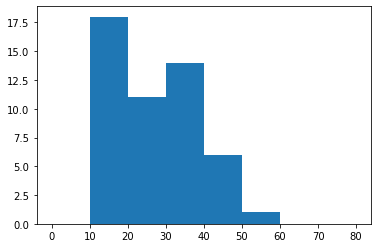

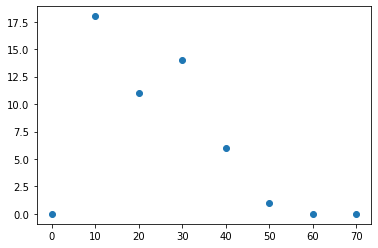

In [7]:
pathLength = distanceTravelled*gamma
print(type(pathLength))
pathLength = pathLength[np.where(pathLength >= 15000)]
print(min(pathLength))
#print(len(pathLength))
H = 15000
cos_angle = H/pathLength
angle = np.arccos(cos_angle)*180/np.pi
print(min(angle))
bins = [0,10,20,30,40,50,60,70,80]
plt.figure(1)
n4, bins4, patches4 = plt.hist(angle, bins=bins)

plt.figure(2)
plt.scatter(bins4[0:-1], n4)



We can see above that we are not getting the results that we expect (we expect something similar to Figure 1.9 in the lab manual).

**2021-01-27, 2:00pm**

## Plan for the Day

* Finish muon path length simulation. Need to figure out the issues encountered with above simulations
* Begin muon momenta simulation

### Continuing Path Length Simulation (Flat Earth Approximation)

Something to note about these simulations is that we've assumed that the velocity of the muons is constant, which will not always be the case. In our lifetime simulation when we checked if a muon has decayed or not, we can also track how far a muon has travelled in each time interval and also we can check if the muon has hit the detector or not (i.e., if a muon has travelled a total of 15km over a number of time intervals).

Here, we will update our previous simulations to track distance travelled by a muon in each time interval, and whether it hits the detector or not. 

25538.734206304427


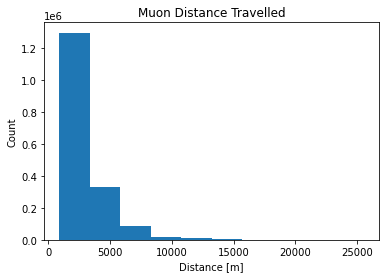

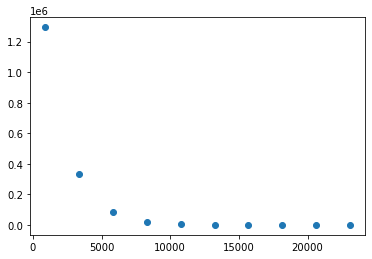

In [8]:
import numpy as np
import matplotlib.pyplot as plt

decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
max_time = 50
number_muons = 1000000
c = 299.792  # speed of light
v = 0.95*c
gamma = 1/np.sqrt(1-(v/c)**2)

time_2_decay = []
list_totalDist = []
for i in range(1, number_muons+1):  # do for many thousand muons
    totalDist = 0
    for j in range(1, max_time+1):  # check over many time intervals of length 1 us
        a = np.random.poisson(decayConstant, number)

        if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
            time_2_decay.append(j)
            break
        if a < decayConstant:  # muon has not yet decayed
            dist = v*(j-(j-1))  # distance travelled in this time interval
            totalDist = totalDist + dist  # total distance travelled over all time intervals so far
            list_totalDist.append(totalDist*gamma)

#print(list_totalDist)        
hitDetector = []
for a in list_totalDist:
    if a >= 15000:  # if a >= 15000m, it will have hit detector
        hitDetector.append(a)  # array of distances travelled by muons that hit the detector
        
print(max(list_totalDist))
plt.figure(1)
plt.title('Muon Distance Travelled')
plt.xlabel('Distance [m]')
plt.ylabel('Count')
n5, bins5, patches5 = plt.hist(list_totalDist)
plt.figure(2)
plt.scatter(bins5[0:-1], n5)

1153
[14.67267128 14.67267128 23.98599312 30.05348385 34.6862759 ]


<Figure size 432x288 with 0 Axes>

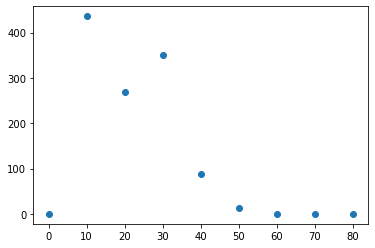

In [9]:
pathLength = np.array(hitDetector)
print(len(pathLength))
H = 15000
cos_angle = H/pathLength
angle = np.arccos(cos_angle)*180/np.pi
print(angle[0:5])
bins6 = [0,10,20,30,40,50,60,70,80,90]
plt.figure(1)
n6, bins6 = np.histogram(angle, bins=bins6)
plt.figure(2)
plt.scatter(bins6[0:-1], n6)

In [10]:
for i in range(0,10):
    distance = 15000/np.cos(np.radians(i*10))
    print("Distance travelled if enter at angle {} degrees: {} m".format(i*10, distance))

Distance travelled if enter at angle 0 degrees: 15000.0 m
Distance travelled if enter at angle 10 degrees: 15231.399178286176 m
Distance travelled if enter at angle 20 degrees: 15962.666587138681 m
Distance travelled if enter at angle 30 degrees: 17320.508075688773 m
Distance travelled if enter at angle 40 degrees: 19581.10933998418 m
Distance travelled if enter at angle 50 degrees: 23335.857402906182 m
Distance travelled if enter at angle 60 degrees: 29999.999999999993 m
Distance travelled if enter at angle 70 degrees: 43857.0660024463 m
Distance travelled if enter at angle 80 degrees: 86381.55724715447 m
Distance travelled if enter at angle 90 degrees: 2.4496859029793053e+20 m


**2021-01-29, 2:00pm**

## Plan for the Day

In this lab session, we will be finishing up with the muon path length simulations. The current issue with the simulations above is that we expect to see a large number of muons hitting the detector at 0 to 10 (not including 10) degrees, but instead we see zero muons hitting at 0 degrees. If we continue to assume that the height of the atmosphere is 15000m (this is where the muons will be created), then any muons that travel a distance between 15000 and 15231m will have hit the detector at an angle between 0 and 10 degrees. What we then need to figure out is if the issue with our simulation is caused by where we calculate the distance travelled (i.e., are there any muons travelling a distance between 15000 and 15231m) or if it is in converting these distances to an angle.

First, we will trake the data from above (`hitDetector`, which is an array that contains the distances travelled by all muons that travelled at least 15000m) and plot that to see what we get:

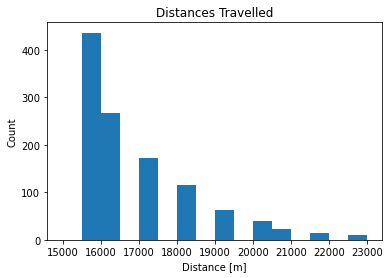

In [11]:
plt.title('Distances Travelled')
plt.xlabel('Distance [m]')
plt.ylabel('Count')
n7, bins7, patches7 = plt.hist(hitDetector,
                               bins=[15000,15500,16000,16500,17000,17500,18000,18500,19000,19500,20000,20500,
                                     21000,21500,22000,22500,23000])

We see that there are no muons that travel a distance between 15000 and 15500m, so we need to go back and figure out the issue with calculating the distance in our simulations.

#### How Many Time Intervals Must a Muon Survive For in Order to Reach the Detector?

We will continue with our assumption that the height of the atmosphere is 15000m, and that all muons travel at the same (constant) speed of $0.95$c. We will also need to account for relativistic effects. Because the speed is constant, the muons will travel the same distance $d = vt = (300\text{m}\mu\text{s}^{-1})(1\mu\text{s})$ in each time interval in the muon frame, and a distance $D = d\gamma$ according to a stationary observer. We then get: $$(\text{Number of intervals}) = \frac{15000\text{m}}{v\gamma} = 16.437 \approx 17 \text{ time intervals}$$

### Updates

It turns out that the issue above was not actually with the simulation itself, but rather my understanding of what was being simulated. It is important to note that the computed distance at each time interval is the **maximum** distance that the muon could travel at and still hit the detector. When we look at the values in the array `hitDetector`, we see that the minimum value is around 15505m, which is the distance travelled if the muon hit the detector and decayed exactly at the end of the 17th time interval. But the muon may have hit the detector sometime within that time interval, and so this distance of 15505m can only be an upper limit to how far the muon actually travelled.

Also, we will note that a muon that has a maximum distance of maybe 23335m (an angle of 50 degrees) could still have possibly hit the detector much sooner. This distance is the distance that the muon would have travelled if it did not hit the detector before it decayed. What all this implies is that all the muons could have possibly hit the detector at 0 degrees (as long as they did not decay sooner), and only the muons with a maximum angle larger than 10 degrees could have possibly hit the detector at 10 degrees, and so on. Also, the muons that could have hit the detector at 10 degrees could have also possibly hit the detector at 0 degrees, so we will need to count these muons for both cases.

[1153 1153  717  449   99   12    0    0    0]


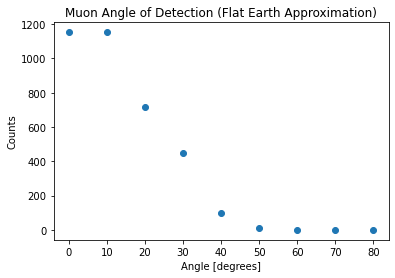

In [12]:
numbMuonsAng = n6
for i in range(len(numbMuonsAng)):
    for j in range(i+1, len(numbMuonsAng)):
        numbMuonsAng[i] = numbMuonsAng[i]+numbMuonsAng[j]
        
plt.figure(1)
plt.title('Muon Angle of Detection (Flat Earth Approximation)')
plt.xlabel('Angle [degrees]')
plt.ylabel('Counts')
plt.scatter(bins6[0:-1], numbMuonsAng)
print(numbMuonsAng)

### Sperical (True) Earth

For this part of the simulation, the only thing we will need to change is the geometry of the system; all other aspects of the simulation will be the same as with the flat Earth approximation. We will be following the geometry derived in Ref. [2] of the lab manual, "Energy and angular distributions of atmospheric muons at the earth" (2018) by Prashant Shukla and Sundaresh Sankrith. 

In the figure below, d is the height of the atmosphere (15000m) and the path length that we will be investigating is given by S. The angle that we will be looking at is $\theta$. R is the radius of the Earth, and O is the origin, in this case, the centre of the Earth. ![true_earth](true_earth.jpeg)

In equation (7) in the paper by Shukla and Sankrith, a relation is given for the ratio of the inclined path length S to the vertial length d: $$\frac{S}{d} = \sqrt{\left(\frac{R^2}{d^2}\cos^2\theta+\frac{2R}{d}+1\right)}-\frac{R}{d}\cos\theta$$

We can rearrange this equation and solve for $\theta$ in terms of the height of the atmosphere d and path length S. We will then use this equation in our simulation to find the angular dependence of the muons hitting the detector. $$\left( \frac{S}{d} + \frac{R}{d}\cos\theta \right)^2 = \frac{R^2}{d^2}\cos^2\theta + \frac{2R}{d}+1 \\ \frac{S^2}{d^2} + \frac{2Rs}{d^2}\cos\theta + \frac{R^2}{d^2}\cos^2\theta = \frac{R^2}{d^2}\cos^2\theta + \frac{2R}{d}+1 \\ \cos\theta = \frac{d^2}{2Rs}\left( \frac{2R}{d} + 1 - \frac{S^2}{d^2} \right)$$

We can now input this equation into the above simulation (copied down below) to get the angular dependence for the true geometry of the Earth.

1153
[14.69032146 14.69032146 24.015986   30.09248667 34.73292855]
[1153 1153  717  449   99   12    0    0    0]


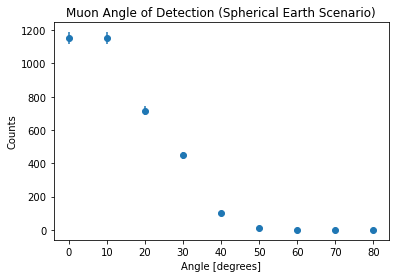

In [13]:
pathLengthSp = np.array(hitDetector)
print(len(pathLengthSp))
H = 15000
R = 6.371e6  # radius of Earth in m
cos_angleSp = (H*H/(2*R*pathLengthSp))*(2*R/H + 1 - (pathLengthSp/H)**2)
angleSp = np.arccos(cos_angleSp)*180/np.pi

print(angleSp[0:5])

bins10 = [0,10,20,30,40,50,60,70,80,90]
#plt.figure(1)
n10, bins10 = np.histogram(angleSp, bins=bins10)
#plt.figure(2)
#plt.scatter(bins10[0:-1], n10)

numbMuonsAngSp = n10
for i in range(len(numbMuonsAngSp)):
    for j in range(i+1, len(numbMuonsAngSp)):
        numbMuonsAngSp[i] = numbMuonsAngSp[i]+numbMuonsAngSp[j]
        
print(numbMuonsAngSp)
        
#plt.figure(3)
plt.title('Muon Angle of Detection (Spherical Earth Scenario)')
plt.xlabel('Angle [degrees]')
plt.ylabel('Counts')
#plt.scatter(bins10[0:-1], numbMuonsAngSp)
plt.errorbar(bins10[0:-1], numbMuonsAngSp, xerr=None, yerr=np.sqrt(numbMuonsAngSp), fmt = 'o')
plt.savefig('counts_ang_not_mom.jpg')

The above plot looks very similar to the plot from the flat Earth approximation, so there may be an issue with this simulation. We do however expect the two scenarios to be comparable, as we often can assume that the Earth is flat locally. These results will be discussed more on Monday.

#### To Discuss on Monday:
* Results of path length simulations so far, compare results with others
* Plans for next week: finish up path length (speherical/true Earth), begin muon momenta simulations
    * At this point I am slightly behind my planned schedule, but I don't think it will be too difficult to catch up
* Apparatus: details and importance of quad discriminator and coincidence modules (3-5 min presentation)

## Experimental Apparatus: Signal Processing Hardware

The signal processing hardware in this experiment is very important, as this part of the apparatus will filter out background noise and only accept signals that are most likely from actual muons. There are two components: the quad discriminator and the quad coincidence module. 

### Quad Discriminator

* Used to filter out background noise
* Generates square logic pulses (up/down) in response to input signal meeting/exceeding a specified threshold
* In our case, a logic pulse will be produced if the PMT signals are strong enough (“strong enough” to be determined)
* The logic pulse will last for as long as PMT signal is strong enough
* One QD for each PMT (2 total)
* Very important part of experimental setup; need to set threshold to be low enough to filter through muons but not so low that noise also gets through

The input signal to the quad discriminator comes from the PMT:
![QD_input](QD_input.jpeg)

The output signal is a logic pulse that lasts as long as the PMT signal is strong enough (this is also the input signal to the coincidence module):
![QD_output](QD_output.jpeg)

### Quad Coincidence Module

* Used to ensure that muons that hit the detector closer to one PMT than the other will still be recorded as a muon
    * Muons must hit both scintillators anywhere along the length
* Generates logic pulse when the inputs meet specified conditions
* In our case, a pulse will be output if the signals from the 2 QDs go to the coincidence module within 20 ns of each other
* From here the signal goes to data acquisition (Multi Channel Analyzer)

The output of the coincidence module is a logic pulse that stays up for as long as there are coincidences between the two input signals:
![CM_output](CM_output.jpeg)



**2021-02-01, 3:00pm**

## Plan for the Day

* Finish analysis of path length simulation
* Begin muon momenta simulations

We will first try doing the path length simulation a slightly different way just to see if we get the same resutls as above. If we do, then we can assume our results are valid and that the flat Earth approximation is very reasonable in the context of this experiment. Instead of using the path length from `hitDetector` to calculate the angle of entry, we will calculate the distance needed to travel at each angle (given in increments of 10 degrees) and then look at the array `hitDetector` to determine how many muons have travelled at least that distance, and then plot the counts at each angle. 

Distance travelled if enter at angle 0 degrees: 15000.0 m
Distance travelled if enter at angle 10 degrees: 15231.399178286176 m
Distance travelled if enter at angle 20 degrees: 15962.666587138681 m
Distance travelled if enter at angle 30 degrees: 17320.508075688773 m
Distance travelled if enter at angle 40 degrees: 19581.10933998418 m
Distance travelled if enter at angle 50 degrees: 23335.857402906182 m
Distance travelled if enter at angle 60 degrees: 29999.999999999993 m
Distance travelled if enter at angle 70 degrees: 43857.0660024463 m
Distance travelled if enter at angle 80 degrees: 86381.55724715447 m
Distance travelled if enter at angle 90 degrees: 2.4496859029793053e+20 m
Distance travelled if enter at angle 0 degrees: 15000.0 m
Distance travelled if enter at angle 10 degrees: 15230.843046145708 m
Distance travelled if enter at angle 20 degrees: 15960.183828505593 m
Distance travelled if enter at angle 30 degrees: 17313.73272023717 m
Distance travelled if enter at angle 40 degre

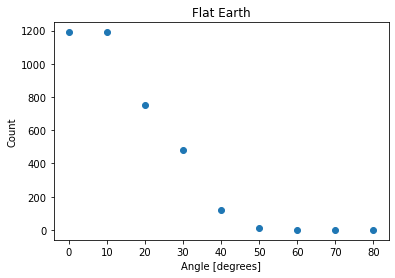

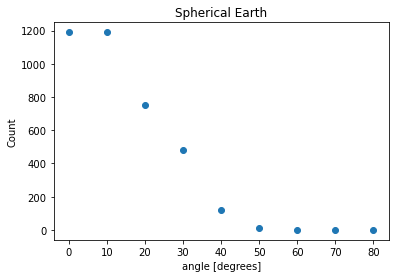

In [20]:
ang = [0,10,20,30,40,50,60,70,80]
H = 15000
R = 6371000
dist_ang = []
for i in range(0,10):
    distance = 15000/np.cos(np.radians(i*10))
    print("Distance travelled if enter at angle {} degrees: {} m".format(i*10, distance))
    dist_ang.append(distance)
    
list_count = []
for m in dist_ang:
    count = 0
    for n in hitDetector:
        if n >= m:
            count = count + 1
    list_count.append(count)



dist_angSp = []
for i in range(0,10):
    distanceSp = H*(np.sqrt((R/H)**2 * (np.cos(np.radians(i*10)))**2 + 2*R/H + 1) - R*np.cos(np.radians(i*10))/H)
    print("Distance travelled if enter at angle {} degrees: {} m".format(i*10, distanceSp))
    dist_angSp.append(distanceSp)
    
list_countSp = []
for m in dist_angSp:
    countSp = 0
    for n in hitDetector:
        if n >= m:
            countSp = countSp + 1
    list_countSp.append(countSp)
    
    
print(list_countSp)

plt.figure(1)
plt.title('Flat Earth')
plt.xlabel('Angle [degrees]')
plt.ylabel('Count')
plt.scatter(ang, list_count[0:-1])

plt.figure(2)
plt.title('Spherical Earth')
plt.xlabel('angle [degrees]')
plt.ylabel('Count')
plt.scatter(ang, list_countSp[0:-1])

We do see that we get the same results, so we can assume that these results are indeed valid.

### Muon Momenta

We will assume that the momentum of the muons follows a Gaussian distribution. Most of the muons have a momentum within $0.1-1.0$ Gev/c (see lab manual), so we will use these to pull random numbers from a Gaussian distribution, similar to how we pulled random numbers from the Poissionan distribution for the lifetime simulations. We will use a mean/peak value of $0.55$, and a standard deviation of $0.45$ based on the range of momenta given. We can then alter the above lifetime simulations to generate a random momentum for each muon (and thus a different lifetime) and use these values to determine how far each muon travels given that we no longer have that all muons travel at the same speed.

**Questions**
* Does muon lifetime depend on momenta or do we need to generate random numbers for both momentum and lifetime?
    * If lifetime does depend on momentum, how can we determine the lifetime from the momentum?

**2021-02-03, 2:30pm**

## Plan for the Day
* Continue with muon momenta simulations: ensure that lifetime and momenta are being accounted for correctly

From the momentum of a given muon, we can calculate its velocity, through the formula $$p = \gamma mv = \frac{mv}{\sqrt{1-v^2/c^2}}$$

Rearranging this, we get $$v = \frac{1}{\sqrt{1/c^2+m^2/p^2}}$$

The mass of a muon is $105.7 \: \text{MeV/c}^2$. Once we obtain the velocity of the muon, we can then calculate how far it travels in each time interval to determine if it would still hit the detector before it decays.

In our simulation below, we do still need to pull random numbers from the Poissonian distribution to determine how long the muon survives for before it decays. We will also use `numpy.random.normal(mean, std, number)` to generate random momenta for each muon. Everything else in the simulation will be the same, but we will need to calculate $\gamma$ for each muon within the for loops, as each muon will now have a different $\gamma$ factor that will change how far it travels in each interval (in the muon's frame).

<ipython-input-4-a4c5cb504208>:53: RuntimeWarning: overflow encountered in exp
  return numb_muons*np.exp(-lamb*t)


[[1.00462051e-06 9.61921218e-02]
 [9.61921218e-02 1.29666902e+04]]
muon lifetime: 2.229929538939151 +/- 4.995561609759696e-06 microseconds 
 number muons: 56699.499194655924 +/- 12966.690175713418


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


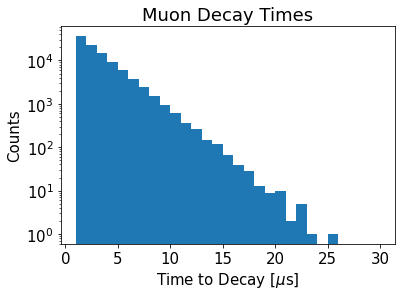

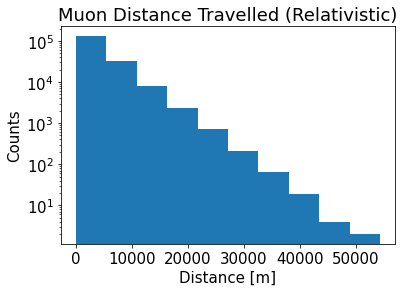

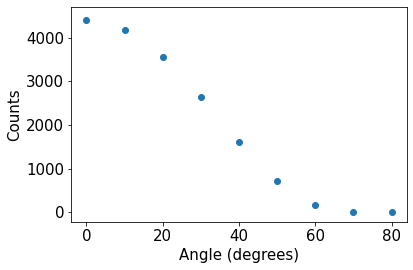

In [4]:
# momentum simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

muons = 100000
tmax = 50

decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
p_mean = 0.55
p_std = 0.2
c = 299.792  # speed of light
m = 0.1057 # muon mass in GeV/c^2

time_to_decay2 = []
list_totalDist2 = []
for i in range(1, muons+1):  # do for many thousand muons
    p = np.random.normal(p_mean, p_std, number)
    v2 = float(1/np.sqrt(1 + (m/p)**2)*c)
    gamma2 = 1/np.sqrt(1-(v2/c)**2)
    total_Dist2 = 0
    for j in range(1, tmax+1):  # check over many time intervals of length 1 us
        a = np.random.poisson(decayConstant, number)

        if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
            time_to_decay2.append(j)
            break
        if a < decayConstant:  # muon has not yet decayed
            dist2 = v2*(j-(j-1))  # distance travelled in this time interval
            total_Dist2 = total_Dist2 + dist2  # total distance travelled over all time intervals so far
            list_totalDist2.append(float(total_Dist2*gamma2))

       
hitDetector2 = []
for i in list_totalDist2:
    if i >= 15000:  # if a >= 15000m, it will have hit detector
        hitDetector2.append(i)  # array of distances travelled by muons that hit the detector

        
plt.figure(1)     
plt.title('Muon Decay Times')
plt.xlabel(r'Time to Decay [$\mu$s]')
plt.ylabel('Counts')
plt.yscale('log')
n11, bins11, patches11 = plt.hist(time_to_decay2,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                                       19,20,21,22,23,24,25,26,27,28,29,30])

def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)

tmax2 = range(1, bins11[-1])  # updating time array to only go up to times that have a decayed muon
fitparams2, pcov2 = curve_fit(expDecay, tmax2, n11)
found_decayConstant2 = fitparams2[0]
numberMuons2 = fitparams2[1]
tau2 = 1/found_decayConstant2  # muon lifetime
print(pcov2)
rel_err2 = pcov2[0,0]/found_decayConstant2
tau_err2 = tau2*rel_err2

print('muon lifetime: {} +/- {} microseconds \n number muons: {} +/- {}'.format(tau2, tau_err2,
                                                                                numberMuons2, pcov2[1,1]))
plt.figure(2)
plt.title('Muon Distance Travelled (Relativistic)')
plt.xlabel('Distance [m]')
plt.ylabel('Counts')
plt.yscale('log')
n12,bins12,patches12 = plt.hist(list_totalDist2)


H = 15000
R = 6.371e6  # radius of Earth in m
cos_angle2 = (H*H/(2*R*np.array(hitDetector2))*(2*R/H + 1 - (np.array(hitDetector2)/H)**2))
angle2 = np.arccos(cos_angle2)*180/np.pi

n13,bins13,patches13 = plt.hist(angle2,bins=[0,10,20,30,40,50,60,70,80,90])

numbMuonsAng2 = n13
for i in range(len(numbMuonsAng2)):
    for j in range(i+1, len(numbMuonsAng2)):
        numbMuonsAng2[i] = numbMuonsAng2[i]+numbMuonsAng2[j]
        
        
plt.figure(3)
#plt.title('Muon Angle of Detection (Spherical Earth Scenario)')
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
plt.xlabel('Angle (degrees)')
plt.ylabel('Counts')
plt.errorbar(bins13[0:-1], numbMuonsAng2, xerr=None, yerr=np.sqrt(numbMuonsAng2), fmt = 'o')
plt.tight_layout()
plt.savefig('prl_counts_ang_with_mom.jpg')


### Comparing Simulation with Differing Momenta to Constant Momenta

We do see many similarities between the two scenarios. In both cases, we get back the expected muon lifetime of about $2.2\mu\text{s}$. The decay times are very similar, which would make sense, as that part of the simulation was not really affected by the addition of varying momenta (we still pulled random numbers from the Poissonian distribution to determine when the muon would decay). We do see that in the distance travelled plot (taking into account relativity), some of the muons travel much further than before. Here, some muons travelled almost 80km, whereas with the constant momenta, the maximum distance travelled was around 25km. Lastly, we see a much smoother looking plot of the angle of detection of the muons (for the spherical scenario). This could be because we are more accurately simulating the behaviour of the muons in real life.

Before we altered our simulations to have varying momenta for the muons, each muon had the same momentum. We can calculate this momentum based on the velocity (95% the speed of light): $$p = \gamma m v = (3.2026)(0.1057\:\text{GeV/c}^2)(0.95\text{c})=0.322\:\text{GeV/c}$$

In our incorporation of the varying momenta, we assumed that muons could have a momentum of up to $1.0\:\text{GeV/c}$, so it does make sense that we are seeing some muons travel much further than before.

### Muon Attenuation 

From the momentum of each muon, we can calculate its energy via the formula $$E=\sqrt{p^2c^2+m^2c^4}$$

What we will want to do for these simulations is compute the energy of each muon when it is created, and then for each time interval it lives for, we will calculate $dE/dx$, and update the energy accordingly. By doing this, we will be able to determine the maximum possible energy of the muons when they hit the detector, based on their initial momentum and the maximum distance it could have travelled before decaying. Something to note is that when we update the energy of the muon at each time interval, we will also have to update their momentum and speed accordingly. We will use the Bethe Formula to calculate $dE/dx$ in each interval: 

$$-\left<\frac{dE}{dx}\right> = \frac{4\pi}{m_ec^2}\frac{nz^2}{\beta^2}\left( \frac{e^2}{4\pi \epsilon_0} \right)^2 \left[ \ln\left( \frac{2m_ec^2\beta^2}{I\left( 1-\beta^2 \right)} \right) -\beta^2 \right]$$

Here, $m_e$ is the electron mass, $z$ is the charge of the particle (for a muon, $z=-1$), $\beta=v/c$, $e$ is the elementary charge, and $I$ is mean excitation potential, and is approximately equal to $(10 \:\text{eV})Z$, where $Z$ is the atomic number of the medium. Lastly, $n = \frac{N_AZ\rho}{AM_u}$, where $A$ is the atomic mass of the medium, $\rho$ is the density of the medium, $N_A$ is Avogadro number, and $M_u$ is the molar mass constant. In cgs units, $\epsilon_0 = 1$.

The atmosphere is approximately $78\%$ nitrogen, $21\%$ oxygen, and $0.9 \approx 1\%$ argon. Putting these together, we get: $$A = 0.78(14.0067)+0.21(15.999)+0.01(39.948) = 14.684496\:\text{amu} = 2.438\times 10^{-23}\:\text{g} \\ Z = 0.78(7)+0.21(8)+0.01(18) = 7.32\approx 7$$

We will also approximate the density of the atmosphere to be $\rho = 1.2 \times 10^{-3} \:\text{g cm}^{-3}$.

**2021-02-05, 2:00pm**

## Plan for the Day
* Get the muon attenuation simulation working

For the attenuation, we will use the same simulations as above, but now we will add in the attenuation part in order to investigate how the muon's energy changes as it moves through the atmosphere. For each muon, we will randomly determine its momenta, and from there calculate its energy, velocity, and distance travelled within a time interval. Then, using the Bethe formula above, we will calculate how much energy it has lost over a small distance, and then add that change to the energy of the muon. From this new energy, we can recalculate the momentum and velocity at the end of the time interval, which will then be the new momentum and velocity that the muon has when we go into the next time interval, and these will be used to calculate the distance travelled in this interval. 

We will also need to account for the fact that the formula above is for $\left< \frac{dE}{dx} \right>$, which is the average change in energy per distance. Thus with each new calculation of $\frac{dE}{dx}$ in a given time interval, we will need to then compute the average of that with all the other previous calculations of $\frac{dE}{dx}$ for a given muon, and then that average is what we will use to determine the new energy at the end of a given time interval.

#### Units

We will be working in cgs units. By doing this, we can set $\epsilon_0=1$, and $m_ec^2 = (5.11\times 10^8 \:\text{eV/c}^2)(c^2) = 5.11\times 10^8 \:\text{eV}$. The elementary charge $e$ will be measured in statcoloumbs, $e = 4.8\times 10^{10} \:\text{statC =}\text{cm}^{3/2}\text{g}^{1/2}\text{s}^{-1}$. When we calculate $n$, $A$ will need to be in amu, and $p$ will need to be in cgs units. We expect $\left< \frac{dE}{dx}\right>$ to be in units of $\text{eV cm}^{-1}$, so we end up with the following: $$\left[ \frac{\text{eV}}{\text{cm}} \right] = \left[ \text{eV}^{-1} \right]\left[ \text{cm}^{-3} \right]\left[ \text{cm}^{6} \right]\left[ \text{g}^{2} \right]\left[ \text{s}^{-4} \right]\\= \left[ \text{eV}^{-1} \right]\left[ \text{erg} \right]\left[ \text{cm g s}^{-2} \right] \\ = \left[ \text{eV}^{-1} \right]\left[ \text{erg} \right]\left[ \text{erg/cm} \right]$$

We will need to convert the erg to eV in order for those two units of energy to cancel properly. $1 \:\text{eV} = 1.602 \times 10^{-12}\:\text{erg}$. Thus $$1\:\text{erg} \times \frac{1\:\text{eV}}{1.602\times 10^{-12}\:\text{erg}}\times \frac{1}{\text{eV}}\times \frac{\text{erg}}{\text{cm}}\times \frac{1\:\text{eV}}{1.602\times 10^{-12}\:\text{erg}} = 3.8965\times 10^{23}\:\text{eV/cm}$$

We will need to multiply $\left<\frac{dE}{dx}\right>$ by the above number in order for the units to work out.

<ipython-input-37-ca29a339627c>:65: RuntimeWarning: invalid value encountered in sqrt
  p_new = np.sqrt(E_new**2 - (m)**2)


2.9473090089028265e-19
2.945125637905788e-19


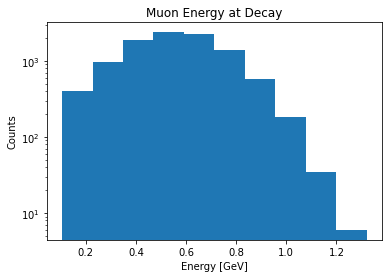

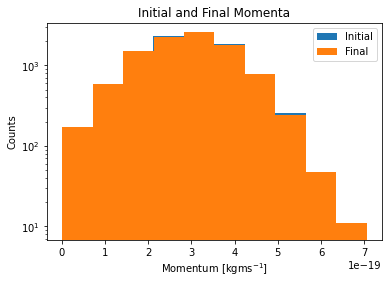

In [37]:
# attenuation simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

muons = 10000
tmax = 50

decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
p_mean = 0.55
p_std = 0.2
c = 299.792  # speed of light, m/us 
m = 1.057e8 # muon mass in eV/c^2
#Z = 7  # atomic number 
#A = 14.684496  # atomic mass, amu
#M_u = 1  # molar mass constant, g mol-1
#N_A = 6.02e23  # avogadro, mol-1
#rho = 1.2e-3  # density of atm, gcm-3
m_e = 5.11e5 # electron mass, eV/c^2
#I = 10*Z  # mean excitation potential, eV
I = 80.5
e = 4.8e-10  # elementary charge, statC = cm^3/2 g^1/2 s^-1
#n = N_A*Z*rho/(A*M_u)
#print(n)
n = 2.504e19


time_to_decay2 = []
list_totalDist2 = []
E_list = []
p0_list = []
pf_list = []
for i in range(1, muons+1):  # do for many thousand muons
    p = abs(float(np.random.normal(p_mean, p_std, number)))*1e9  # in units of eV/c
    p0_list.append(p*5.36e-28)
    v2 = 1/np.sqrt(1 + (m/p)**2)*c
    gamma2 = 1/np.sqrt(1-(v2/c)**2)
    beta = v2/c
    E = np.sqrt((p)**2 + (m)**2)
    total_Dist2 = 0
    dEdx_list = []
    E_new = E
    for j in range(1, tmax+1):  # check over many time intervals of length 1 us
        a = np.random.poisson(decayConstant, number)

        if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
            time_to_decay2.append(j)
            break
        if a < decayConstant:  # muon has not yet decayed
            dist2 = v2*100  # distance travelled in this time interval, cm
            total_Dist2 = total_Dist2 + dist2  # total distance travelled over all time intervals so far
            list_totalDist2.append(float(total_Dist2*gamma2))
            
            # Bethe formula gives average change in E per distance, <dE/dx>: (eV/cm)
            dEdx = - (4*np.pi*n*e*e*e*e/(m_e*beta*beta*16*np.pi*np.pi)) * (np.log(2*m_e*beta*beta/(I*(1-beta**2)))
                                                                           - beta**2)
            
            dEdx = dEdx*3.8965e23  # convert to units of eV/cm
            #print(dEdx)
            E_new = E_new + dEdx*dist2
            p_new = np.sqrt(E_new**2 - (m)**2)
            v_new = 1/np.sqrt(1 + (m/p_new)**2)*c
            gamma_new = 1/np.sqrt(1-(v_new/c)**2)
            beta_new = v_new/c  
            
            beta = beta_new    
            v2 = v_new
            gamma2 = gamma_new
    pf_list.append(p_new*5.36e-28)
    E_list.append(float(E_new/1e9))  # record energy of muon at max distance it can travel before decaying (GeV)
    
    

pf_list = [x for x in pf_list if str(x) != 'nan']

print(sum(p0_list)/len(p0_list))
print(sum(pf_list)/len(pf_list))


plt.title('Muon Energy at Decay')
plt.xlabel('Energy [GeV]')
plt.ylabel('Counts')
plt.yscale('log')
plt.figure(1)
nn,bbins,ppatches = plt.hist(E_list)

plt.figure(2)
plt.title('Initial and Final Momenta')
plt.xlabel(r'Momentum [kgms$^{-1}$]')
plt.ylabel('Counts')
plt.yscale('log')
plt.hist(p0_list, label = 'Initial')
#plt.figure(3)
#plt.yscale('log')
plt.hist(pf_list, label = 'Final')
plt.legend()


We will need to compare the above plot with an expected plot of the muon attenuation to see if our simulation gives back the expected results. We will try to reproduce a plot of initial and final momenta for the muons, similar to Figure 1.11 in the lab manual. This will be discussed more on Monday.

#### To Discuss on Monday
* Final results of muon path length/angle simulations
* Results of muon momenta simulation
* Go over process of simulation with muon attenuation, discuss results/possible errors with simulation
    * Possible error could be in computing $\frac{dE}{dx}$ versus $\left< \frac{dE}{dx} \right>$ and incorporating this change into total energy of muon
* Plans for next week: finish up with attenuation, begin analyzing actual data

**2021-02-08, 12:00pm**

### Updates

In order to see what momenta the muons are being created with, the value of sigma for the Gaussian distribution was reduced from $0.45$ to $0.2$. This will allow us to have a much narrower distribution of momenta, but muons will still be created with momenta within the range of $0.1-1.0\:\text{GeV/c}$.

### More on Attenuation

Note that the intensity of the muons is given as: $I(\theta)=I(0)\cos^n\theta$, $n$ is a function of momentum. What we will want to do eventually is fit our data (actual data and simulated) to extract $n$. We will use the counts (which are similar to intensity) versus angle to find $n$ for many different values of momentum. In order to do this, we will simulate muons with different peak momenta and smaller standard deviations. This way, we will be able to keep track of the momentum that each muon has. 

### Aside: Error and Uncertainty

For the simulated data, we will only need to deal with statistical uncertainties, because we do not have any detectors or equipment to contribute to a systematic error.

The process of detecting muons is also a Poissonian process. This is each muon hitting the detector is independent of the other muons, and that the rate at which the muons hit the detector is also constant. If we were to detect muons for a certain amount of time and repeat this many times, we could calculate the average number of muons that hit the detector in a given time. The uncertainty of this average would be the full width half maximum of this average. For a large number of counts (which we will be dealing with here), this uncertainty is given by $\sqrt{N}$. Thus, we will need to add error bars to our above plots where the uncertainty of each value of "counts" (N) on a plot is equal to $\sqrt{N}$.

### Plan for the Day

We then need to alter the momentum and attenuation simulations to calculate the random momentum differently. We will do this by creating a list of peak values (within $0.1-1.0\:\text{GeV/c}$) of the Gaussian distribution, and creating muons with random momenta that follow distributions with each of these different parameters. All peaks will have the same standard deviation of $0.2$.

In [47]:
# momentum simulation
# adapted to instead generate random momenta from smaller distributions with peaks
# between 0.1-1.0GeV/c --> this way way can more precisely determine the momenta of
# muons that give us a specific value of n(p) in the intensity equation
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)


def intensity(theta, n, I0):
    return I0*(np.cos(np.radians(theta)))**n

ns1 = []
muons = 10000
tmax = 50
decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
c = 299.792  # speed of light
m = 0.1057 # muon mass in GeV/c^2
H = 15000
R = 6.371e6  # radius of Earth in m

p_mean = [0.3, 0.55, 0.8, 1.0, 1.2, 1.4]
p_std = 0.2

time_to_decay22 = [[],[],[],[],[],[]]
list_totalDist22 = [[],[],[],[],[],[]]
hitDetector22 = [[],[],[],[],[],[]]
p_all = [[],[],[],[],[],[]]
for b in range(len(p_mean)):
    for i in range(1, muons+1):  # do for many thousand muons
        p = np.random.normal(p_mean[b], p_std, number)
        p_all[b].append(p)
        v22 = float(1/np.sqrt(1 + (m/p)**2)*c)
        gamma22 = 1/np.sqrt(1-(v22/c)**2)
        total_Dist22 = 0
        for j in range(1, tmax+1):  # check over many time intervals of length 1 us
            a = np.random.poisson(decayConstant, number)

            if a > decayConstant:  # muon has decayed
                # if muon has decayed, we want to track which time interval it decayed in,
                # i.e, how long the muon lived before it decayed
                time_to_decay22[b].append(j)
                break
            if a < decayConstant:  # muon has not yet decayed
                dist22 = v22*(j-(j-1))  # distance travelled in this time interval
                total_Dist22 = total_Dist22 + dist22  # total distance travelled over all time intervals so far
                list_totalDist22[b].append(float(total_Dist22*gamma22))

    for i in list_totalDist22[b]:
        if i >= H:  # if a >= 15000m, it will have hit detector
            hitDetector22[b].append(i)  # array of distances travelled by muons that hit the detector
    n112, bins112 = np.histogram(time_to_decay22[b],bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                                  19,20,21,22,23,24,25,26,27,28,29,30])

    tmax22 = range(1, 30)  # updating time array to only go up to times that have a decayed muon
    fitparams22, pcov22 = curve_fit(expDecay, tmax22, n112)
    found_decayConstant22 = fitparams22[0]
    numberMuons22 = fitparams22[1]
    tau22 = 1/found_decayConstant22  # muon lifetime
    rel_err22 = pcov22[0,0]/found_decayConstant22
    tau_err22 = tau22*rel_err22

    print('muon lifetime: {} +/- {} microseconds \n number muons: {} +/- {}'.format(tau22, tau_err22,
                                                                                numberMuons22, pcov22[1,1]))

    cos_angle22 = (H*H/(2*R*np.array(hitDetector22[b]))*(2*R/H + 1 - (np.array(hitDetector22[b])/H)**2))
    angle22 = np.arccos(cos_angle22)*180/np.pi

    n132,bins132 = np.histogram(angle22,bins=[0,10,20,30,40,50,60,70,80,90])

    numbMuonsAng22 = n132
    for i in range(len(numbMuonsAng22)):
        for j in range(i+1, len(numbMuonsAng22)):
            numbMuonsAng22[i] = numbMuonsAng22[i]+numbMuonsAng22[j]
        
    count_err = np.sqrt(np.array(numbMuonsAng22))
    for i in range(len(count_err)):
        print('count at {} degrees with momentum peak at {} GeV/c: {} +/- {}'.format(bins132[0:-1][i], 
                                                                                 p_mean[b], numbMuonsAng22[i], count_err[i]))
    
    fitparams_n, pcov_n = curve_fit(intensity, bins132[0:-1], numbMuonsAng22)
    n_p = fitparams_n[0]
    I0 = fitparams_n[1]
    print('n = {} for momenta with peak of {}'.format(n_p, p_mean[b]))
    ns1.append(n_p)
    

<ipython-input-47-659f01d6a3fb>:11: RuntimeWarning: overflow encountered in exp
  return numb_muons*np.exp(-lamb*t)


muon lifetime: 2.1812812849980165 +/- 9.316436150048954e-05 microseconds 
 number muons: 5768.861301998264 +/- 2531.6831589650064
count at 0 degrees with momentum peak at 0.3 GeV/c: 99 +/- 9.9498743710662
count at 10 degrees with momentum peak at 0.3 GeV/c: 97 +/- 9.848857801796104
count at 20 degrees with momentum peak at 0.3 GeV/c: 77 +/- 8.774964387392123
count at 30 degrees with momentum peak at 0.3 GeV/c: 56 +/- 7.483314773547883
count at 40 degrees with momentum peak at 0.3 GeV/c: 37 +/- 6.082762530298219
count at 50 degrees with momentum peak at 0.3 GeV/c: 17 +/- 4.123105625617661
count at 60 degrees with momentum peak at 0.3 GeV/c: 5 +/- 2.23606797749979
count at 70 degrees with momentum peak at 0.3 GeV/c: 0 +/- 0.0
count at 80 degrees with momentum peak at 0.3 GeV/c: 0 +/- 0.0
n = 3.973119154841366 for momenta with peak of 0.3
muon lifetime: 2.2468052671616054 +/- 3.131777679581135e-05 microseconds 
 number muons: 5625.594910536017 +/- 797.2015411291626
count at 0 degrees with

In [48]:
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)


def intensity(theta, n, I0):
    return I0*(np.cos(np.radians(theta)))**n
'''

ns2 = []
muons = 10000
tmax = 50
decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
c = 299.792  # speed of light
m = 0.1057 # muon mass in GeV/c^2
H = 15000
R = 6.371e6  # radius of Earth in m

p_mean = [1.6, 1.8, 2.0, 5.0, 10.0]
p_std = 0.2

time_to_decay22 = [[],[],[],[],[]]
list_totalDist22 = [[],[],[],[],[]]
hitDetector22 = [[],[],[],[],[]]
p_all = [[],[],[],[],[]]
for b in range(len(p_mean)):
    for i in range(1, muons+1):  # do for many thousand muons
        p = np.random.normal(p_mean[b], p_std, number)
        p_all[b].append(p)
        v22 = float(1/np.sqrt(1 + (m/p)**2)*c)
        gamma22 = 1/np.sqrt(1-(v22/c)**2)
        total_Dist22 = 0
        for j in range(1, tmax+1):  # check over many time intervals of length 1 us
            a = np.random.poisson(decayConstant, number)

            if a > decayConstant:  # muon has decayed
                # if muon has decayed, we want to track which time interval it decayed in,
                # i.e, how long the muon lived before it decayed
                time_to_decay22[b].append(j)
                break
            if a < decayConstant:  # muon has not yet decayed
                dist22 = v22*(j-(j-1))  # distance travelled in this time interval
                total_Dist22 = total_Dist22 + dist22  # total distance travelled over all time intervals so far
                list_totalDist22[b].append(float(total_Dist22*gamma22))

    for i in list_totalDist22[b]:
        if i >= H:  # if a >= 15000m, it will have hit detector
            hitDetector22[b].append(i)  # array of distances travelled by muons that hit the detector
    n112, bins112 = np.histogram(time_to_decay22[b],bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                                  19,20,21,22,23,24,25,26,27,28,29,30])

    tmax22 = range(1, 30)  # updating time array to only go up to times that have a decayed muon
    fitparams22, pcov22 = curve_fit(expDecay, tmax22, n112)
    found_decayConstant22 = fitparams22[0]
    numberMuons22 = fitparams22[1]
    tau22 = 1/found_decayConstant22  # muon lifetime
    rel_err22 = pcov22[0,0]/found_decayConstant22
    tau_err22 = tau22*rel_err22

    print('muon lifetime: {} +/- {} microseconds \n number muons: {} +/- {}'.format(tau22, tau_err22,
                                                                                numberMuons22, pcov22[1,1]))

    cos_angle22 = (H*H/(2*R*np.array(hitDetector22[b]))*(2*R/H + 1 - (np.array(hitDetector22[b])/H)**2))
    angle22 = np.arccos(cos_angle22)*180/np.pi

    n132,bins132 = np.histogram(angle22,bins=[0,10,20,30,40,50,60,70,80,90])

    numbMuonsAng22 = n132
    for i in range(len(numbMuonsAng22)):
        for j in range(i+1, len(numbMuonsAng22)):
            numbMuonsAng22[i] = numbMuonsAng22[i]+numbMuonsAng22[j]
        
    count_err = np.sqrt(np.array(numbMuonsAng22))
    for i in range(len(count_err)):
        print('count at {} degrees with momentum peak at {} GeV/c: {} +/- {}'.format(bins132[0:-1][i], 
                                                                                 p_mean[b], numbMuonsAng22[i], count_err[i]))
    
    fitparams_n, pcov_n = curve_fit(intensity, bins132[0:-1], numbMuonsAng22)
    n_p = fitparams_n[0]
    I0 = fitparams_n[1]
    print('n = {} for momenta with peak of {}'.format(n_p, p_mean[b]))
    ns2.append(n_p)

<ipython-input-47-659f01d6a3fb>:11: RuntimeWarning: overflow encountered in exp
  return numb_muons*np.exp(-lamb*t)


muon lifetime: 2.262442936466777 +/- 3.590082093889633e-05 microseconds 
 number muons: 5587.670216020367 +/- 898.4700088815705
count at 0 degrees with momentum peak at 1.6 GeV/c: 4927 +/- 70.19259220174163
count at 10 degrees with momentum peak at 1.6 GeV/c: 4814 +/- 69.38299503480663
count at 20 degrees with momentum peak at 1.6 GeV/c: 4461 +/- 66.79071791798619
count at 30 degrees with momentum peak at 1.6 GeV/c: 3972 +/- 63.02380502635492
count at 40 degrees with momentum peak at 1.6 GeV/c: 3202 +/- 56.586217403180434
count at 50 degrees with momentum peak at 1.6 GeV/c: 2241 +/- 47.3392015141785
count at 60 degrees with momentum peak at 1.6 GeV/c: 1213 +/- 34.828149534535996
count at 70 degrees with momentum peak at 1.6 GeV/c: 351 +/- 18.734993995195193
count at 80 degrees with momentum peak at 1.6 GeV/c: 19 +/- 4.358898943540674
n = 1.9396792531956137 for momenta with peak of 1.6
muon lifetime: 2.144296782120618 +/- 3.4604399994859727e-05 microseconds 
 number muons: 5924.67077580

**2021-02-10, 2:00pm**

## Plan for the Day

Today, we will be fixing the attenuation simulation, and starting to look at actual data. With the attenuation simulations, I believe the issue is with the fact that the Bethe formula computes the average change in energy per distance, but I don't think that has been accounted for properly in the above code. Once this is done, we can begin to analyze the actual data, and use it to determine what momenta of muons we detect at the surface of the Earth by fitting the data and extracting $n$. 

From there, we can bring in the attenuation of the muons to more accurately determine these momenta, as the momenta of the muons that we detect is going to be less than the momenta that these muons were created with. 

### Attenuation

In order to figure out the issues with the attenuation simulation, we will change all the units into SI units in order to keep track of everything. We expect that the change in energy for a muon is about $1 \:\text{MeV/m}$, so we will look out for this in our simulations.

The Bethe formula above was obtained from Wikipedia, however, a slightly different version of this formula (known as the Bethe-Bloch formula) can be found in Ref. [1] in the lab manual, _Cosmic Rays at the Earth: Researcher's Reference Manual and Data Book_ (North Holland Amsterdam, 2001) by Peter K F Grieder: 

![Bethe-Bloch](bethe_bloch.jpeg)

These two formulas are very similar, as $r_e = \frac{1}{4\pi\epsilon_0}\frac{e^2}{m_ec^2}$, $n = \frac{N_A Z \rho}{A M_u}$, and $\gamma = (1-\beta^2)^{-1/2}$ but this formula contains $\delta$, the density effect, which is approximately equal to $2\ln\gamma$.

In the Bethe-Bloch formula, $dx$ represents the "thickness or column density expressed in mass per unit area [g/cm^2]". The constants can be evaluated to be: $4\pi N_Ar_e^2m_ec^2 = 0.3071\:\text{MeV cm}^2\text{g}^{-1}$. All other parts of the formula are dimensionless, so when we calculate $dE/dx$, we will then multiply by $\rho = 1.2\times 10^{-3}\:\text{g/cm}^3$ to get units of $\text{MeV/cm}$.

<ipython-input-1-141714996acb>:95: RuntimeWarning: invalid value encountered in sqrt
  p_new = np.sqrt(E_new**2 - (m*c_si*c_si)**2)/c_si


0.5533608700320449
0.4312395970167399


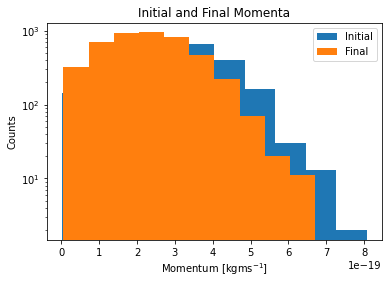

In [1]:
# attenuation simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)


def intensity(theta, n, I0):
    return I0*(np.cos(np.radians(theta)))**n


muons = 1000
tmax = 50
H = 15000
R = 6371000

decayConstant = 1/2.2  # units of (us)^-1
number = 1  # number of iterations to pull from poissonian
#p_mean = [0.55]
p_mean3 = [0.4, 0.55, 0.7, 0.9, 1.1, 1.3]
p_std3 = 0.2
c = 299.792  # speed of light, m/us 

N_A = 6.02e23
Z = 7  # atomic number 
A = 14.684496  # atomic mass, amu
r_e = 2.818e-15

m = 1.883e-28 #kg
c_si = 3e8 #m/s
I = 80.5*1.602e-19 #J
n = 25.04e24 #m^-3
z = 1 # 1e charge #1.602e-19 #e charges
m_e = 9.109e-31#kg
e = 1.602e-19 #Coulombs
epsilon = 8.854e-12 #F/m

momInit = 1*5.36e-19 #GeV/c*conversion to kgm/s
momInitSigma = 0.2*5.36e-19 #GeV/c * conversion



time_to_decay23 = [[],[],[],[],[],[],[]]
list_totalDist23 = [[],[],[],[],[],[],[]]
hitDetector23 = [[],[],[],[],[],[],[]]
E_list3 = [[],[],[],[],[],[],[]]
p0_list3 = [[],[],[],[],[],[],[]]
pf_list3 = [[],[],[],[],[],[],[]]
for b in range(len(p_mean3)):
    for i in range(1, muons+1):  # do for many thousand muons
        p = abs(float(np.random.normal(p_mean3[b], p_std3, number)))*5.36e-19  # in units of kg m s-2
        p0_list3[b].append(p)
        v2 = 1/np.sqrt(1/c_si**2 + (m/p)**2)
        gamma2 = 1/np.sqrt(1-(v2/c_si)**2)
        beta = v2/c_si
        E = np.sqrt((p*c_si)**2 + (m*c_si*c_si)**2)
        total_Dist23 = 0
        dEdx_list3 = []
        E_new = E
        for j in range(1, tmax+1):  # check over many time intervals of length 1 us
            a = np.random.poisson(decayConstant, number)

            if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
                time_to_decay23.append(j)
                break
            if a < decayConstant:  # muon has not yet decayed
                dist2 = v2*1e-6  # distance travelled in this time interval
                total_Dist23 = total_Dist23 + dist2  # total distance travelled over all time intervals so far
                list_totalDist23[b].append(float(total_Dist23*gamma2))
            
                # Bethe formula gives average change in E per distance, <dE/dx>: (J/m)
                # this should be on the order of 1MeV/cm ~ 1.6e-11 J/m
                #dEdx = -1*(4*np.pi*n*e*e*e*e/(m_e*c_si*c_si*beta*beta*16*np.pi*np.pi*epsilon*epsilon)) * \
                #(np.log(2*m_e*c_si*c_si*beta*beta/(I*(1-beta**2))) - beta**2)
                
                #dEdx = -1*(4*np.pi*N_A*r_e*r_e*m_e*c_si*c_si*Z*12/(A*beta*beta)) * \
                #(np.log(2*m_e*c_si*c_si*beta*beta*gamma2*gamma2/(I*(1-beta**2))) - beta**2 - np.log(gamma2))
                
                dEdx = -1*0.3071*Z/(A*beta*beta) * (np.log(2*m_e*c_si*c_si*beta*beta*gamma2*gamma2/(I*(1-beta**2)))
                                                    - beta**2 - np.log(gamma2))  # MeV cm2 / g
                
                dEdx = dEdx*1.2e-3  # MeV cm^2/g --> MeV/cm (multiply by density in g/cm^3) 
                #print(dEdx)  # MeV/cm
                dEdx = dEdx*1.6e-13*100  # 1MeV = 1.6e-13 J, 1/1cm = 100/1m
                
                #print(E_new)
                
                E_new = E_new + dEdx*dist2
                p_new = np.sqrt(E_new**2 - (m*c_si*c_si)**2)/c_si
                v_new = 1/np.sqrt(1/c_si**2 + (m/p_new)**2)
                gamma_new = 1/np.sqrt(1-(v_new/c_si)**2)
                beta_new = v_new/c_si 
                
                beta = beta_new    
                v2 = v_new
                gamma2 = gamma_new
            pf_list3[b].append(p_new)
            E_list3[b].append(float(E_new/1.6e-19))  # record energy of muon at max distance it can travel before decaying (GeV)

        pf_list3[b] = [x for x in pf_list3[b] if str(x) != 'nan']
        
        
initial_p = p0_list3[0] + p0_list3[1] + p0_list3[2]
final_p = pf_list3[0] + pf_list3[1] + pf_list3[2]
print((sum(initial_p)/len(initial_p))/5.36e-19)
print((sum(final_p)/len(final_p))/5.36e-19)
'''    
plt.title('Muon Energy at Decay')
plt.xlabel('Energy [GeV]')
plt.ylabel('Counts')
plt.yscale('log')
plt.figure(1)
nn,bbins,ppatches = plt.hist(E_list)
'''
plt.figure(1)
plt.title('Initial and Final Momenta')
plt.xlabel(r'Momentum [kgms$^{-1}$]')
plt.ylabel('Counts')
plt.yscale('log')
plt.hist(initial_p, label = 'Initial')
#plt.figure(3)
#plt.yscale('log')
plt.hist(final_p, label = 'Final')
plt.legend()

The difference between the initial and final momenta is about $0.12 \:\text{GeV/c}$. The average change in energy per distance should be about $1\:\text{MeV/cm}$, but right now it is lower than that by a factor of about 100. However, this simulation is working better than the previous attenuation simulation, because the difference between the initial and final momenta here is a noticeable and consistent difference. We will leave this for now, and work on analyzing some actual data, and then come back to improving this simulation later in the week. 

**2021-02-12, 2:00pm**

## Plan for the Day 

Today, we will work on analyzing data to extract $n$ values and determine the momentum of the muons that we detect. We will do this by comparing the actual data to the simulated data. We will first do this without accounting for the attenuation of the muons, and then we will add in the attenuation to improve the results.

We will first download the required data (using code provided by Daniel Yates):

In [49]:
#necessary imports
import requests
import io
import pandas as pd

#we are going to pull the data directly from the Github into the notebook as opposed to
#downloading it and then uploading it to your Jupyter server

#we need the url of all of the data first:
directoryUrl = 'https://raw.githubusercontent.com/jonahberean/PHYS409_UBC/master/Muons/Data/'

#now we need a specific filename to look at:
fileName = ['05082020_Scan1.dat','06082020_Scan2.dat','07082020_Scan3.dat','08082020_Scan1.dat',
            '09082020_Scan2.dat','10082020_Scan3.dat','11082020_Scan4.dat','12082020_Scan5.dat',
            '15082020_Scan1.dat','17082020_Scan2.dat','19082020_Scan3.dat','21082020_Scan4.dat',
            '23082020_Scan5.dat','29082020_Scan1.dat','31082020_Scan2.dat','02092020_Scan3.dat',
            '04092020_Scan4.dat','06092020_Scan5.dat','08092020_Scan1.dat','10092020_Scan2.dat',
            '12092020_Scan3.dat','14092020_Scan4.dat','16092020_Scan5.dat','18092020_Scan1.dat',
            '19092020_Scan2.dat','20092020_Scan3.dat','21092020_Scan4.dat','22092020_Scan5.dat']

angles_list = []
counts_list = []
#add the file name to the url of the data
for file in fileName:
    url = directoryUrl + file

    #now we will dowload that data
    download = requests.get(url).content

    #now, we have to read that file. It is a tab-separated file, so this will read it and put it into a pandas dataframe
    df = pd.read_csv(io.StringIO(download.decode('utf-8')),sep="\t")

    #We want to convert from a pandas data frame into a numpy array
    data = df.to_numpy()

    #now, we want to take it from a 2-d numpy array and convert it to two lists
    angle1 = data[:,0]
    counts1 = data[:,1]
    angles_list.append(angle1)
    counts_list.append(counts1)

#let's print them out to see what they look like:
print(len(angles_list))
print(len(counts_list))

28
28


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def intensity(theta, n, I0):
    return I0*(np.cos(np.radians(theta)))**n


n_vals = []
I0_vals = []
n_vals_err = []
for i in range(28):
    fitparams_dat1, pcov_dat1 = curve_fit(intensity, angles_list[i], counts_list[i])
    n = fitparams_dat1[0]
    I0 = fitparams_dat1[1]
    n_vals_err.append(np.sqrt(pcov_dat1[0,0]))
    n_vals.append(n)
    I0_vals.append(I0)
    
print(n_vals)

[0.03330337188617866, 0.035820616490072406, 1.3795320412286978, 1.5924867002427296, 1.5155433199169115, 1.3514670811739262, 1.322766645780736, 1.4462601315247032, 1.4995193047206945, 1.4858987050362986, 1.540471975844088, 1.3593200272771595, 1.2650051736038808, 1.0031515449500894, 1.0862976093893792, 1.0535019395663907, 1.0359953920043599, 0.9712754640650544, 0.02326702049606524, 0.02723229163348387, 0.8156631275917731, 0.8212454254435738, 0.838426759776589, 0.017859589761240753, 0.02149308132181159, 0.021583788369197332, 0.021384862443740625, 0.02387003593247244]


<ipython-input-50-7f6ee715074c>:6: RuntimeWarning: overflow encountered in power
  return I0*(np.cos(np.radians(theta)))**n


Now that we have the fitted values of $n$ from the data, we need to compare these to the results of our momentum simulations, where we plotted $n$ versus $p$. From that plot, we can estimate the momentum that the muons have when they hit the detector. We will need to figure out a function that relates $n$ and $p$ based on the following plot (copied from above momentum simulations):

[0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
[3.973119154841366, 3.7330435108899573, 3.2371034333324435, 2.734965022976338, 2.555064995326178, 2.177914443800582, 1.9396792531956137, 1.8871501088564615, 1.7535005955392085, 0.759880362919051, 0.5092547661407344]


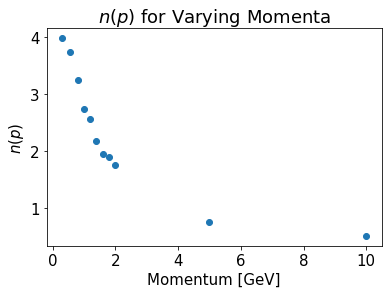

In [51]:
p_mean = [0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
ns = ns1+ns2
p = np.linspace(0, max(p_mean), 100)
print(p_mean)
print(ns)

plt.title(r'$n(p)$ for Varying Momenta')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
plt.scatter(p_mean, ns)





We can see that $n$ decreases as the momentum is increased. This could be exponential decay or a power law. We will try fitting this data to both of these functions, and see what returns the best fit:

a=2.5394841662134335 +/- 0.10718285025291414 
 b=-0.4696163265624053 +/- 0.052030192973582946


<ipython-input-54-4359d43f04f8>:6: RuntimeWarning: divide by zero encountered in power
  return a*x**b


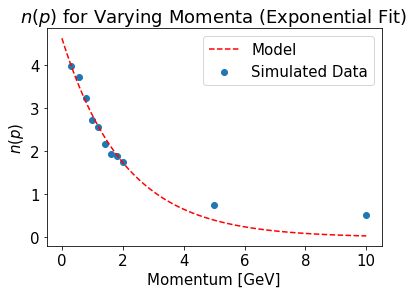

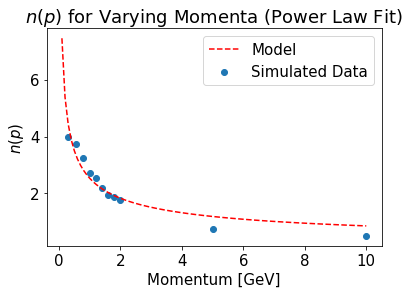

In [54]:
def expo(x, a, b):
    return a*np.exp(-b*x)


def power_law(x, a, b):
    return a*x**b

fp_e, pc_e = curve_fit(expo, p_mean, ns)
fp_p, pc_p = curve_fit(power_law, p_mean, ns)

print('a={} +/- {} \n b={} +/- {}'.format(fp_p[0], np.sqrt(pc_p[0,0]), fp_p[1], np.sqrt(pc_p[1,1])))

plt.figure(1)
plt.title(r'$n(p)$ for Varying Momenta (Exponential Fit)')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
#plt.xscale('log')
plt.plot(p,expo(p,fp_e[0], fp_e[1]), 'r--',label='Model')
plt.scatter(p_mean, ns, label='Simulated Data')
plt.legend()


plt.figure(2)
plt.title(r'$n(p)$ for Varying Momenta (Power Law Fit)')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
#plt.xscale('log')
plt.scatter(p_mean, ns, label = 'Simulated Data')
plt.plot(p, power_law(p, fp_p[0], fp_p[1]), 'r--', label = 'Model')
plt.legend()

The power law is a better fit than the exponential decay, but the model does start to stray from the data at $p = 5\:\text{GeV/c}$. This could possibly be because this model may only be valid for a certain range of momenta. For now, however, we will use this power law function on the $n$ values extracted from actual data in order to determine the momentum these muons had when they hit the detector. The function parameters are: $$n(p) = 2.6432p^{-0.58366}$$

We can solve this for $p$: $$p(n) = \left( \frac{n}{2.6432} \right)^{\frac{-1}{0.58366}}$$

filename: 05082020_Scan1.dat
momentum = 10187.665297033012 +/- -5342.233207123575 GeV/c when n = 0.03330337188617866
filename: 06082020_Scan2.dat
momentum = 8723.48853560286 +/- -5161.6927890268535 GeV/c when n = 0.035820616490072406
filename: 07082020_Scan3.dat
momentum = 3.667073732601704 +/- -0.38539753776450847 GeV/c when n = 1.3795320412286978
filename: 08082020_Scan1.dat
momentum = 2.701247731731998 +/- -0.22334436156248286 GeV/c when n = 1.5924867002427296
filename: 09082020_Scan2.dat
momentum = 3.0016659106847707 +/- -0.23527481578853268 GeV/c when n = 1.5155433199169115
filename: 10082020_Scan3.dat
momentum = 3.8311338859358113 +/- -0.29202686508824494 GeV/c when n = 1.3514670811739262
filename: 11082020_Scan4.dat
momentum = 4.010311238930466 +/- -0.28417595577418786 GeV/c when n = 1.322766645780736
filename: 12082020_Scan5.dat
momentum = 3.316162846138213 +/- -0.1363874584524054 GeV/c when n = 1.4462601315247032
filename: 15082020_Scan1.dat
momentum = 3.0703810600502 +/- -0.1

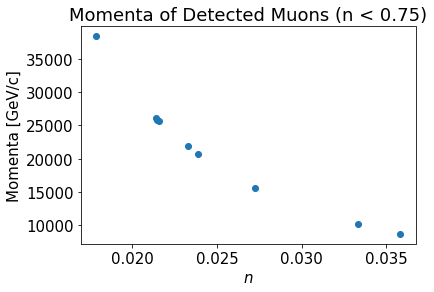

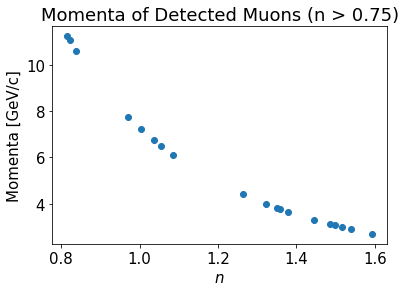

In [57]:
def momentum_power_law(n):
    return (n/fp_p[0])**(1/fp_p[1])


n_vals = np.array(n_vals)
n_vals_err = np.array(n_vals_err)

momenta = momentum_power_law(n_vals)
mom_err = []
for i in range(len(n_vals)):
    rel_err = fp_p[1]*n_vals_err[i]/n_vals[i]
    mom_err.append(rel_err*momenta[i])
    
for i in range(len(n_vals)):
    print('filename: {}'.format(fileName[i]))
    print('momentum = {} +/- {} GeV/c when n = {}'.format(momenta[i], mom_err[i], n_vals[i]))


mom1 = momenta[np.where(n_vals < 0.75)]
n_vals1 = n_vals[np.where(n_vals < 0.75)]
mom2 = momenta[np.where(n_vals > 0.75)]
n_vals2 = n_vals[np.where(n_vals > 0.75)]

plt.figure(1)
plt.title('Momenta of Detected Muons (n < 0.75)')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.scatter(n_vals1, mom1)

plt.figure(2)
plt.title('Momenta of Detected Muons (n > 0.75)')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.scatter(n_vals2, mom2)

We see that from about $n = 0.0175$ to somewhere between $n=0.04$ and $n = 0.75$, the momentum is quite a bit larger than from $n = 0.8$ onwards. It seems like we then have two distinct groups of muons that we detect, with one group having a momentum on the order of $10^3\:\text{GeV/c}$ and another group with momenta between about $2-8\:\text{GeV/c}$. This first group seems to possibly be wrong, because we know that most of the muons are created with momenta between $0.1-1.0\:\text{GeV/c}$. This will be looked into more next week, and this issue could possibly be fixed when we add in the attenuation of the muons into these calculations.

### Plans for Next Week
* Finish up above analysis
* Finish up Data Analysis by adding in attenuation calculations
* Ensure that all plots have proper error bars, discussion of uncertainty, etc.
* Start writing up report and presentation

**2021-02-15, 2:00pm**

## Plan for the Day

Today, we will be finishing up with data analysis. We will also incorporate the attenuation simulations into the data analysis in order to more accurately represent the actual muons as they travel through the atmosphere. An updated version of the attenuation simulations is below: 

In [7]:
def compute_attenuation(muons, tmax, p_mean, p_std):
    H = 15000
    R = 6371000
    decayConstant = 1/2.2  # units of (us)^-1
    number = 1  # number of iterations to pull from poissonian
    N_A = 6.02e23
    Z = 7  # atomic number 
    A = 14.684496  # atomic mass, amu
    r_e = 2.818e-15
    m = 1.883e-28 #kg
    c_si = 3e8 #m/s
    I = 80.5*1.602e-19 #J
    n = 25.04e24 #m^-3
    z = 1 # 1e charge #1.602e-19 #e charges
    m_e = 9.109e-31#kg
    e = 1.602e-19 #Coulombs
    epsilon = 8.854e-12 #F/m
    
    t_to_decay = []
    total_dist = []
    hitDetector = []
    p0s = []
    pfs = []
    for i in range(1, muons+1):  # do for many thousand muons
        p = abs(float(np.random.normal(p_mean, p_std, 1)))*5.36e-19  # in units of kg m s-2
        p0s.append(p)
        v = 1/np.sqrt(1/c_si**2 + (m/p)**2)
        gamma = 1/np.sqrt(1-(v/c_si)**2)
        beta = v/c_si
        E = np.sqrt((p*c_si)**2 + (m*c_si*c_si)**2)
        totalDist = 0
        E_new = E
        p_new = p
        for j in range(1, tmax+1):  # check over many time intervals of length 1 us
            a = np.random.poisson(decayConstant, 1)
            if a > decayConstant:  # muon has decayed
            # if muon has decayed, we want to track which time interval it decayed in,
            # i.e, how long the muon lived before it decayed
                t_to_decay.append(j)
                #print('pf: {} GeV/c'.format(p_new/5.36e-19))
                pfs.append(p_new)  # record final momenta when muon decays
                break
            if a < decayConstant:  # muon has not yet decayed
                dist = v*1e-6  # distance travelled in this time interval
                totalDist = totalDist + dist  # total distance travelled over all time intervals so far
                total_dist.append(float(totalDist*gamma))
                
                # Bethe formula gives average change in E per distance, <dE/dx>: (J/m)
                # this should be on the order of 1MeV/cm ~ 1.6e-11 J/m
                dEdx = -1*(4*np.pi*n*e*e*e*e/(m_e*c_si*c_si*beta*beta*16*np.pi*np.pi*epsilon*epsilon)) * \
                (np.log(2*m_e*c_si*c_si*beta*beta/(I*(1-beta**2))) - beta**2)
                # print(dEdx/1.6e-11) J/m --> MeV/cm
                E_new = E_new + dEdx*dist*gamma
                p_new = np.sqrt(E_new**2 - (m*c_si*c_si)**2)/c_si
                v_new = 1/np.sqrt(1/c_si**2 + (m/p_new)**2)
                gamma_new = 1/np.sqrt(1-(v_new/c_si)**2)
                beta_new = v_new/c_si 
                
                beta = beta_new    
                v = v_new
                gamma = gamma_new
                if totalDist*gamma >= H:
                    hitDetector.append(totalDist*gamma)

        pfs = [x for x in pfs if str(x) != 'nan']
   
    return {'time to decay': t_to_decay, 'total path lengths': total_dist,
            'hit detector': hitDetector, 'initial momenta': p0s, 'final momenta':pfs}

There were some issues with previous attempts at the attenuation simulations, so some changes have been made with this final version. First, we create our list of final momenta values if the muon decays, so that we are only recording the final momentum of a given muon, rather than the intermdeiate values of the momentum as the muon is still travelling. We compute everything in SI units as well. 

When we perform the simulation, we expect that in each interval, the muon loses roughly $1\:\text{MeV/cm}$ of energy. If we print out `dEdx/1.6e-11` (to change units from J/m to MeV/cm) in the above function we do get that, indicating that the attenuation of the muons has been incorporated correctly. Another key error in the prevous simulations was that the special relativistic effects were not taken into account correctly. Mainly, when multiplying the change in energy per distance by the distance travelled in an interval, we need to multiply that distance by $\gamma$ in order for that distance to be in the reference frame of an observer on Earth. 

Now that we have the attenuation simulations figured out, we can do what we did with the momentum simulations, where we simulate muons with different momenta, and then see how the intensity changes with angle for each momentum in order to get $n$ for various momenta. This can then be compared with the actual data to see the momentum of muons that we detect. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def expDecay(t, lamb, numb_muons):
    return numb_muons*np.exp(-lamb*t)


def intensity(theta, n, I0):
    return I0*(np.cos(np.radians(theta)))**n

In [9]:
A = compute_attenuation(10000, 50, 0.3, 0.2)  # A is a dictionary
print('done A')
B = compute_attenuation(10000, 50, 0.55, 0.2)
print('done B')
C = compute_attenuation(10000, 50, 0.8, 0.2)
print('done C')
D = compute_attenuation(10000, 50, 1.0, 0.2)
print('done D')
E = compute_attenuation(10000, 50, 1.2, 0.2)
print('done E')
F = compute_attenuation(10000, 50, 1.4, 0.2)
print('done F')
G = compute_attenuation(10000, 50, 1.6, 0.2)
print('done G')
H = compute_attenuation(10000, 50, 1.8, 0.2)
print('done H')
I = compute_attenuation(10000, 50, 2.0, 0.2)
print('done I')
J = compute_attenuation(10000, 50, 5.0, 0.2)
print('done J')
K = compute_attenuation(10000, 50, 10.0, 0.2)
print('done K')

initial_p = A['initial momenta'] + B['initial momenta'] + C['initial momenta'] + D['initial momenta'] + \
E['initial momenta'] + F['initial momenta'] + G['initial momenta'] + H['initial momenta'] + I['initial momenta'] + \
J['initial momenta'] + K['initial momenta']

final_p = A['final momenta'] + B['final momenta'] + C['final momenta'] + D['final momenta'] + \
E['final momenta'] + F['final momenta'] + G['final momenta'] + H['final momenta'] + I['final momenta'] + \
J['final momenta'] + K['final momenta']

print('Initial average Momenta: {} GeV/c'.format((sum(initial_p)/len(initial_p))/5.36e-19))
print('Final average Momenta: {} GeV/c'.format((sum(final_p)/len(final_p))/5.36e-19))

<ipython-input-7-1b6973964a89>:54: RuntimeWarning: invalid value encountered in sqrt
  p_new = np.sqrt(E_new**2 - (m*c_si*c_si)**2)/c_si


done A
done B
done C
done D
done E
done F
done G
done H
done I
done J
done K
Initial average Momenta: 2.3322522194577417 GeV/c
Final average Momenta: 2.1341429993642596 GeV/c


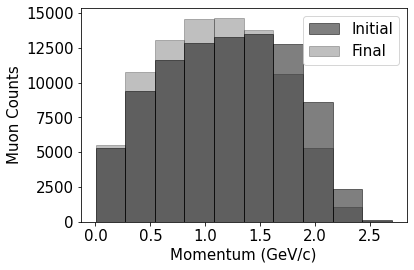

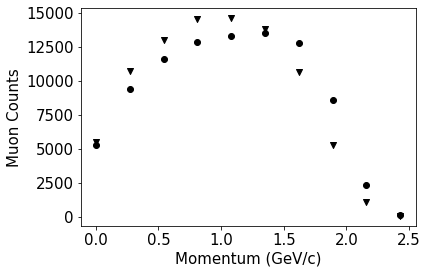

In [33]:
initial_p2 = A['initial momenta'] + B['initial momenta'] + C['initial momenta'] + D['initial momenta'] + \
E['initial momenta'] + F['initial momenta'] + G['initial momenta'] + H['initial momenta'] + I['initial momenta']

final_p2 = A['final momenta'] + B['final momenta'] + C['final momenta'] + D['final momenta'] + \
E['final momenta'] + F['final momenta'] + G['final momenta'] + H['final momenta'] + I['final momenta']

plt.figure(1)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Muon Momentum')
plt.xlabel(r'Momentum (GeV/c)')
plt.ylabel('Muon Counts')
n0, bins0, patches0 = plt.hist(np.array(initial_p2)/5.36e-19, color='black', edgecolor='black', alpha=0.50, label='Initial')
#plt.figure(2)
nf, binsf, patchesf = plt.hist(np.array(final_p2)/5.36e-19, bins=bins0, color='black', edgecolor='black', alpha = 0.25, label='Final')
#plt.legend()
plt.tight_layout()
plt.legend()
plt.savefig('prl_initial_final_mom.jpg')

plt.figure(2)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel(r'Momentum (GeV/c)')
plt.ylabel('Muon Counts')
plt.scatter(bins0[0:-1], n0, marker = 'o', color='k')
plt.scatter(binsf[0:-1], nf, marker = 'v', color='k')
plt.savefig('prl_init_fin_mom_2.jpg')

Although the plot may not be as clear, we do see from the average initial and final momenta that the muons do attenuate, and they lose about $0.2\:\text{GeV/c}$ of momenta as they travel through the atmosphere.

In [22]:
#cosine = (H*H/(2*R*np.array(hitDetector22[b]))*(2*R/H + 1 - (np.array(hitDetector22[b])/H)**2))
#angle = np.arccos(cos_angle22)*180/np.pi

L = [A, B, C, D, E, F, G, H, I, J, K]


def find_n(D:dict):
    hitD = D['hit detector']
    ang = [0,10,20,30,40,50,60,70,80,90]  # this is angle
    R = 6371000
    H = 15000

    dist_angSp = []
    for i in range(0,10):
        distanceSp = H*(np.sqrt((R/H)**2 * (np.cos(np.radians(i*10)))**2 + 2*R/H + 1) - R*np.cos(np.radians(i*10))/H)
        #print("Distance travelled if enter at angle {} degrees: {} m".format(i*10, distanceSp))
        dist_angSp.append(distanceSp)
        
    list_countSp = []
    for m in dist_angSp:
        countSp = 0
        for n in hitD:
            if n >= m:
                countSp = countSp + 1
        list_countSp.append(countSp)  # this is counts
    count_err = np.sqrt(np.array(list_countSp))
        
    fitparams, pcov = curve_fit(intensity, ang, list_countSp)
    #fitparams, pcov = curve_fit(intensity, ang, list_countSp, p0=[2.0, 1000], sigma = count_err, absolute_sigma=True)
    n_err = np.sqrt(pcov[0,0])
    n = fitparams[0]
    I0 = fitparams[1]
    return {'Counts': list_countSp, 'Counts Error': count_err, 'Angle': ang, 'Fitted n': n, 'n error': n_err, 'Fitted I0': I0}

In [23]:
p_means = [0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
att_n_vals = []
error_n = []
for l in range(len(L)):
    n = find_n(L[l])['Fitted n']
    n_err = find_n(L[l])['n error']
    att_n_vals.append(n)
    error_n.append(n_err)
    print('n = {} +/- {} for momentum of {} GeV/c'.format(n, n_err, p_means[l]))
    

n = 15.785332083184183 +/- 4.426883768953589 for momentum of 0.3 GeV/c
n = 9.48080974915486 +/- 0.5106074543590233 for momentum of 0.55 GeV/c
n = 7.910403892206778 +/- 0.3853006426396849 for momentum of 0.8 GeV/c
n = 5.560398779264491 +/- 0.25612506477413455 for momentum of 1.0 GeV/c
n = 4.457333067730346 +/- 0.26797682865124256 for momentum of 1.2 GeV/c
n = 3.4353767940857245 +/- 0.20059939755750178 for momentum of 1.4 GeV/c
n = 3.333142840117831 +/- 0.2078052535133474 for momentum of 1.6 GeV/c
n = 2.7440048784712627 +/- 0.19260092774122387 for momentum of 1.8 GeV/c
n = 2.5334281677173442 +/- 0.1776697726770228 for momentum of 2.0 GeV/c
n = 0.8744499963912604 +/- 0.19119459603892688 for momentum of 5.0 GeV/c
n = 0.5853770191525962 +/- 0.10354880605929641 for momentum of 10.0 GeV/c


<ipython-input-8-c99d7df1247f>:11: RuntimeWarning: overflow encountered in power
  return I0*(np.cos(np.radians(theta)))**n


[0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
[15.785332083184183, 9.48080974915486, 7.910403892206778, 5.560398779264491, 4.457333067730346, 3.4353767940857245, 3.333142840117831, 2.7440048784712627, 2.5334281677173442, 0.8744499963912604, 0.5853770191525962]


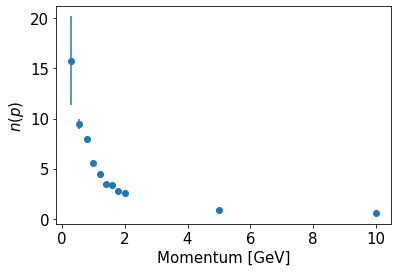

In [24]:
#p_means = p_means[1:]
#att_n_vals = att_n_vals[1:]
#error_n = error_n[1:]

#plt.title(r'$n(p)$ for Varying Momenta (with Attenuation)')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
#plt.scatter(p_means, att_n_vals)
plt.errorbar(p_means, att_n_vals, xerr=None, yerr=error_n, fmt = 'o')
#plt.savefig('n_p_simulated.jpg')
print(p_means)
print(att_n_vals)

We will again fit this function to a power law:

reduced chi square p value: 0.9999873674304923
a=5.3900250851393805 +/- -0.9097100228955313 
 b=0.20083064931795086 +/- 0.03975504052177754


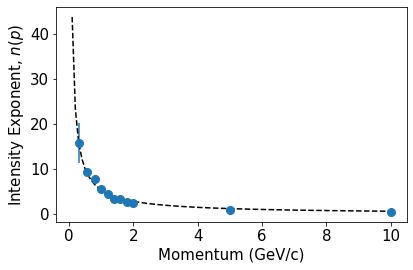

In [31]:
from scipy.stats import chisquare

def power_law(x, a, b):
    return a*x**b

p2 = np.linspace(0.1, max(p_means), 100)
fp, pc = curve_fit(power_law, p_means, att_n_vals)

fitted_n = power_law(p_means, *fp)

chisq1 = list(chisquare(att_n_vals, fitted_n))
print('reduced chi square p value: {}'.format(chisq1[1]))


print('a={} +/- {} \n b={} +/- {}'.format(fp[0],fp[1], np.sqrt(pc[0,0]), np.sqrt(pc[1,1])))

#plt.title(r'$n(p)$ for Varying Momenta (Power Law Fit)')
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
plt.xlabel('Momentum (GeV/c)')
plt.ylabel(r'Intensity Exponent, $n(p)$')
#plt.xscale('log')
#plt.scatter(p_means, att_n_vals, label = 'Simulated Data')
plt.errorbar(p_means, att_n_vals, xerr=None, yerr=error_n, fmt = 'o', ms = 8.0)
plt.plot(p2, power_law(p2, fp[0], fp[1]), 'k--')
plt.tight_layout()
plt.savefig('prl_n_p_fitted.jpg')

It looks like our model fits the simulated data very nicely at all points, which is a bit of an improvement from when we did this without taking into account the attenuation. The function that relates $n$ and $p$ is then: $$n(p) = 5.3229p^{-1.1287}$$

We can solve this for $p$: $$p(n) = \left( \frac{n}{5.3229} \right)^{\frac{-1}{1.1287}}$$

Note that these numbers will change slightly if we redo the simulations, as the simulated data is based on random numbers. However, we expect these parameters to be roughly the same with each run of the simulations, as long as we have a large enough number of muons to simulate.

<ipython-input-8-c99d7df1247f>:11: RuntimeWarning: overflow encountered in power
  return I0*(np.cos(np.radians(theta)))**n


filename: 05082020_Scan1.dat
momentum = 268.13843090990343 +/- -272.37486655246255 GeV/c when n = 0.03330337188617866
filename: 06082020_Scan2.dat
momentum = 247.49898354069109 +/- -283.6842145844626 GeV/c when n = 0.035820616490072406
filename: 07082020_Scan3.dat
momentum = 4.473030069605839 +/- -0.9106487666059336 GeV/c when n = 1.3795320412286978
filename: 08082020_Scan1.dat
momentum = 3.8200589536357636 +/- -0.6118436197606197 GeV/c when n = 1.5924867002427296
filename: 09082020_Scan2.dat
momentum = 4.033779640771405 +/- -0.612470324795192 GeV/c when n = 1.5155433199169115
filename: 10082020_Scan3.dat
momentum = 4.575242181643685 +/- -0.6755684465639306 GeV/c when n = 1.3514670811739262
filename: 11082020_Scan4.dat
momentum = 4.684481936582461 +/- -0.6430290763259646 GeV/c when n = 1.322766645780736
filename: 12082020_Scan5.dat
momentum = 4.246695193664043 +/- -0.3383369815775308 GeV/c when n = 1.4462601315247032
filename: 15082020_Scan1.dat
momentum = 4.081188334554862 +/- -0.3552

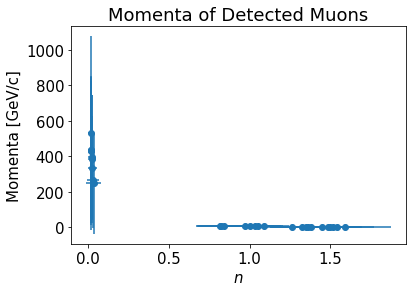

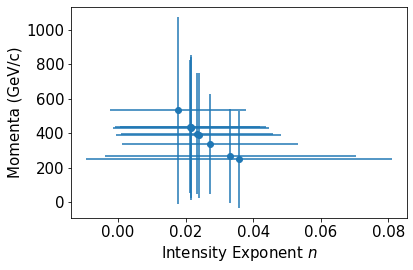

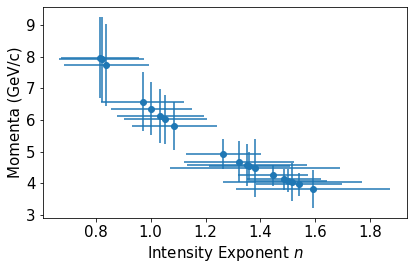

In [34]:
def att_momentum_power_law(n):
    return (n/fp[0])**(1/fp[1])


n_vals = []
I0_vals = []
n_vals_err = []
for i in range(28):
    fitparams_dat1, pcov_dat1 = curve_fit(intensity, angles_list[i], counts_list[i])
    n = fitparams_dat1[0]
    I0 = fitparams_dat1[1]
    n_vals_err.append(np.sqrt(pcov_dat1[0,0]))
    n_vals.append(n)
    I0_vals.append(I0)

n_vals = np.array(n_vals)
n_vals_err = np.array(n_vals_err)

att_momenta = att_momentum_power_law(n_vals)
att_mom_err = []
for n in range(len(n_vals)):
    rel_err = fp[1]*n_vals_err[n]/n_vals[n]
    att_mom_err.append(rel_err*att_momenta[n])
    
for i in range(len(n_vals)):
    print('filename: {}'.format(fileName[i]))
    print('momentum = {} +/- {} GeV/c when n = {}'.format(att_momenta[i], att_mom_err[i], n_vals[i]))


att_mom_err = np.array(att_mom_err)
att_mom1 = att_momenta[np.where(n_vals < 0.75)]
att_n_vals1 = n_vals[np.where(n_vals < 0.75)]
att1_err = att_mom_err[np.where(n_vals < 0.75)]
att_mom2 = att_momenta[np.where(n_vals > 0.75)]
att_n_vals2 = n_vals[np.where(n_vals > 0.75)]
att2_err = att_mom_err[np.where(n_vals > 0.75)]

plt.figure(1)
plt.title('Momenta of Detected Muons')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.errorbar(n_vals, att_momenta, xerr=n_vals_err, yerr=att_mom_err, fmt = 'o')

plt.figure(2)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Momenta of Detected Muons (n < 0.75)')
plt.xlabel(r'Intensity Exponent $n$')
plt.ylabel('Momenta (GeV/c)')
plt.errorbar(att_n_vals1, att_mom1, xerr = n_vals_err[np.where(n_vals < 0.75)], yerr=att1_err, fmt='o')
plt.tight_layout()
plt.savefig('prl_n_075.jpg')

plt.figure(3)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Momenta of Detected Muons (n > 0.75)')
plt.xlabel(r'Intensity Exponent $n$')
plt.ylabel('Momenta (GeV/c)')
plt.errorbar(att_n_vals2, att_mom2, xerr = n_vals_err[np.where(n_vals > 0.75)], yerr=att2_err, fmt='o')
plt.tight_layout()
plt.savefig('prl_n_bigger.jpg')

print('average momenta: {} +/- {} GeV/c'.format(np.mean(att_momenta), sum(att_mom_err)/len(att_mom_err)))
print('average momenta (n<0.75): {} +/- {} GeV/c'.format(np.mean(att_mom1), np.sum(att1_err)/len(att1_err)))
print('average momenta (n>0.75): {} +/- {} GeV/c'.format(np.mean(att_mom2), np.sum(att2_err)/len(att2_err)))

We see above that muons with small $n$ do not have such a high momentum, as we saw previously. These results seem to make a bit more sense, but we still do have two distinct groups of muons that we are detecting. 

## Results Including Attenuation

We get the following: $$p=155 \pm 100 \:\text{GeV/c (all data)} \\ p=469 \pm 400 \:\text{GeV/c (n < 0.75)} \\ p=5.6 \pm 0.7 \:\text{GeV/c (n > 0.75)}$$


**2021-02-17, 2:00pm**

## Plan for the Day

Today, we will spend some time making sure all errors/uncertainties have been taken into account, and we will work on making some nice figures to be used in the presentation and reduced paper. We will also spend some time doing some more analysis on the above results.

### Error and Uncertainty

As mentioned above, the main uncertainties to take into account are with the counts in our counts versus angles data points. The error for $N$ counts is going to be $\sqrt{N}$. This error will then need to be propagated through our simulations in order to find the uncertainty on the momentum of muons. We found that the relation between $n$ and $p$ is a power law, so the error in $p$ will be given by: $$\sigma_p = Ap\frac{\sigma_n}{n}$$

where $A$ is the coefficient in our power law equation. We can get $\sigma_n$ from `curve_fit` when we fit the counts and angles.

### Analysis of Momenta Detected

As with when we did not take into account the attenuation, we get two separate groups of momenta. One in a range that makes sense, about $5\:\text{GeV/c}$ and one that seems too high to be true (above $100\:\text{GeV/c}$), based on the fact that most muons are created with a momentum around $0.1-1.0\:\text{GeV/c}$). We also see that the uncertainty for the group with very small $n$ is very high compared to the actual value, indicating that there is an issue with this data.

**2021-02-19, 2:00pm**

## Plan for the Day

Today, we will finish up with our analysis of momenta. 

### Analyzing Fit of $n(p)$

For our fit of $n(p)$ (we will first focus on the data including attenuation), we will do a reduced Chi-squared fit using `scipy.stats.chisquare` to determine how good it is. We get a p-value of 0.99999.

We will also add some plots of counts vs angle from the actual data with our fit of intensity as a function of the determined $n$ value and $\theta$ to see how well these values match. 

17


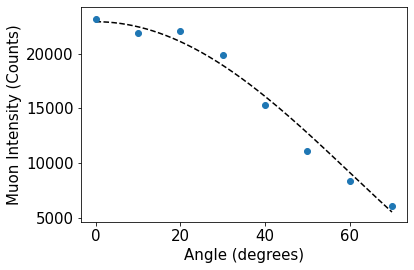

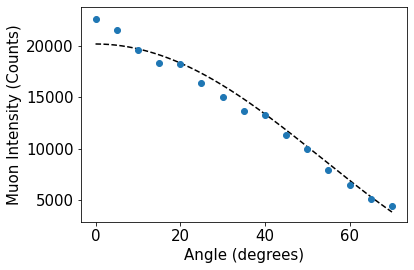

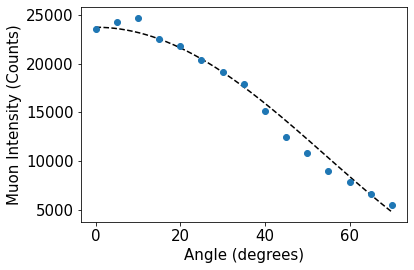

In [46]:
angs = np.linspace(0,70,1000)
print(len(counts_list[8][0:-2]))
plt.figure(1)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle (degrees)')
plt.ylabel('Muon Intensity (Counts)')
plt.errorbar(angles_list[6][0:-2], counts_list[6][0:-2], xerr=None, yerr=np.sqrt(np.array(counts_list[6][0:-2])), fmt='o')
plt.plot(angs, intensity(angs, n_vals[6], I0_vals[6]), 'k--')
plt.tight_layout()
plt.savefig('prl_count_ang1.jpg')
         
plt.figure(2)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle (degrees)')
plt.ylabel('Muon Intensity (Counts)')
plt.errorbar(angles_list[10][0:-4], counts_list[10][0:-4], xerr=None, yerr=np.sqrt(np.array(counts_list[10][0:-4])), fmt='o')
plt.plot(angs, intensity(angs, n_vals[10], I0_vals[10]), 'k--')
plt.tight_layout()
plt.savefig('prl_count_ang2.jpg')
         
plt.figure(3)
font = {'family': 'normal', 'weight': 'normal', 'size': 15}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', **font)
#plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle (degrees)')
plt.ylabel('Muon Intensity (Counts)')
plt.errorbar(angles_list[8][0:-4], counts_list[8][0:-4], xerr=None, yerr=np.sqrt(np.array(counts_list[8][0:-4])), fmt='o')
plt.plot(angs, intensity(angs, n_vals[8], I0_vals[8]), 'k--')
plt.tight_layout()
plt.savefig('prl_count_ang3.jpg')

We can see that the model strays from the data at the end. This is expected because with most of the simulated data that we used to find the correlation between $n$ and $p$, the counts at angles above 70 degrees was zero, but in the actual data, muons are counted at these very high angles. Part of this could be because as the angle that a muon hits the detector at approaches 90 degrees, the distance that it has to travel to reach the detector will get very large. Also, according to Grieder 2001, the intensity $I(\theta) = I_0\cos^n\theta$ is only valid for $0 \leq \theta \leq 75^{\circ}$ (pp. 372), but here I have assumed it to be valid for any value of $\theta$. We do consistently see that it is at about $75^{\circ}$ that the model no longer follows the data.

### Settings on Quad Discriminator

The reason why we see two distinct groups for the momentum could be because of the settings on the quad discriminator. As the threshold is increased, the momentum of a muon must be higher in order for it to be filtered through. It is possible that the reason that we see these two groups is that the threshold was set to be higher for one group than the other.

n = 14.304639538920048 +/- 2.4793067115318403 for momentum of 0.3 GeV/c
n = 11.68873389949235 +/- 0.34547879428378614 for momentum of 0.55 GeV/c
n = 6.750001581361087 +/- 0.28583433592844043 for momentum of 0.8 GeV/c
n = 5.5240618784699 +/- 0.23888614109272893 for momentum of 1.0 GeV/c
n = 4.554954281520938 +/- 0.26650597855969205 for momentum of 1.2 GeV/c
n = 3.715662035850879 +/- 0.21597149949954866 for momentum of 1.4 GeV/c
n = 3.2677751020484958 +/- 0.21578418123939277 for momentum of 1.6 GeV/c
n = 2.794725327345675 +/- 0.2104420025692097 for momentum of 1.8 GeV/c
n = 2.553645253407064 +/- 0.1954153128905071 for momentum of 2.0 GeV/c
n = 0.8663336247329206 +/- 0.20213351110811315 for momentum of 5.0 GeV/c
n = 0.5930329156336084 +/- 0.1125995407181771 for momentum of 10.0 GeV/c
[0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
[14.304639538920048, 11.68873389949235, 6.750001581361087, 5.5240618784699, 4.554954281520938, 3.715662035850879, 3.2677751020484958, 2.79472532734567

<ipython-input-4-7f6ee715074c>:6: RuntimeWarning: overflow encountered in power
  return I0*(np.cos(np.radians(theta)))**n


average momenta: 194.7580438750769 +/- -171.13130182542182 GeV/c
average momenta (n<0.75): 592.8767361199156 +/- -530.746875306588 GeV/c
average momenta (n>0.75): 6.175505443311168 +/- -0.7870828080273035 GeV/c


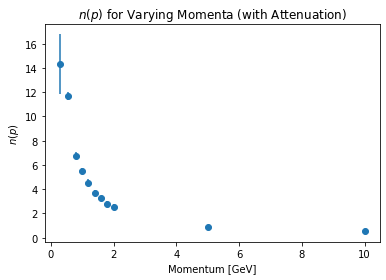

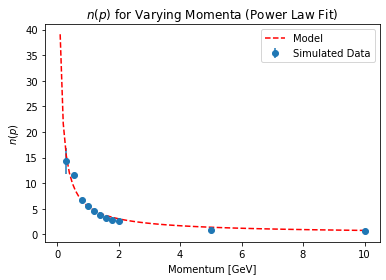

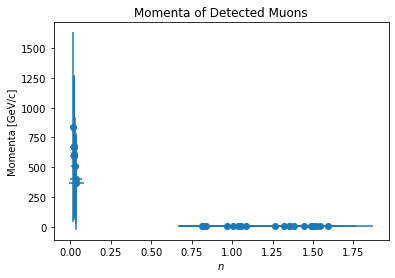

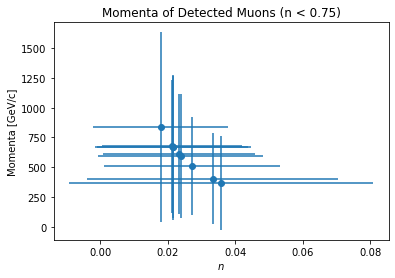

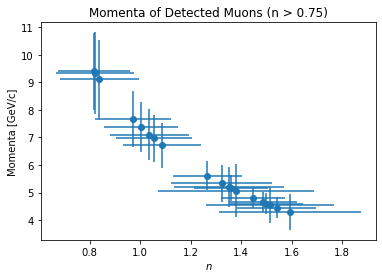

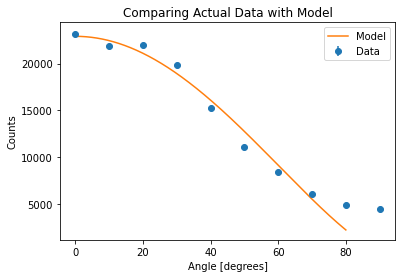

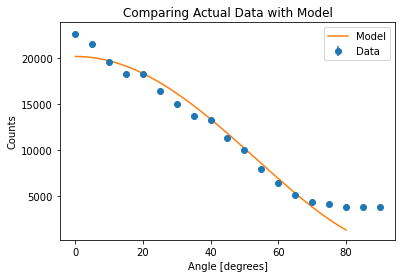

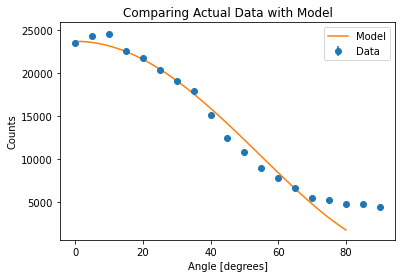

In [16]:
L = [A, B, C, D, E, F, G, H, I, J, K]


def find_n(D:dict):
    hitD = D['hit detector']
    ang = [0,10,20,30,40,50,60,70,80]  # this is angle
    R = 6371000
    H = 15000

    dist_angSp = []
    for i in range(0,9):
        distanceSp = H*(np.sqrt((R/H)**2 * (np.cos(np.radians(i*10)))**2 + 2*R/H + 1) - R*np.cos(np.radians(i*10))/H)
        #print("Distance travelled if enter at angle {} degrees: {} m".format(i*10, distanceSp))
        dist_angSp.append(distanceSp)
        
    list_countSp = []
    for m in dist_angSp:
        countSp = 0
        for n in hitD:
            if n >= m:
                countSp = countSp + 1
        list_countSp.append(countSp)  # this is counts
    count_err = np.sqrt(np.array(list_countSp))
        
    fitparams, pcov = curve_fit(intensity, ang, list_countSp)
    #fitparams, pcov = curve_fit(intensity, ang, list_countSp, p0=[2.0, 1000], sigma = count_err, absolute_sigma=True)
    n_err = np.sqrt(pcov[0,0])
    n = fitparams[0]
    I0 = fitparams[1]
    return {'Counts': list_countSp, 'Counts Error': count_err, 'Angle': ang, 'Fitted n': n, 'n error': n_err, 'Fitted I0': I0}


p_means = [0.3, 0.55, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0]
att_n_vals = []
error_n = []
for l in range(len(L)):
    n = find_n(L[l])['Fitted n']
    n_err = find_n(L[l])['n error']
    att_n_vals.append(n)
    error_n.append(n_err)
    print('n = {} +/- {} for momentum of {} GeV/c'.format(n, n_err, p_means[l]))
    
    
plt.figure(1)
plt.title(r'$n(p)$ for Varying Momenta (with Attenuation)')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
#plt.scatter(p_means, att_n_vals)
plt.errorbar(p_means, att_n_vals, xerr=None, yerr=error_n, fmt = 'o')
#plt.savefig('n_p_simulated.jpg')
print(p_means)
print(att_n_vals)


def power_law(x, a, b):
    return a*x**b

p2 = np.linspace(0.1, max(p_means), 100)
fp, pc = curve_fit(power_law, p_means, att_n_vals)

fitted_n = power_law(p_means, *fp)

chisq1 = list(chisquare(att_n_vals, fitted_n))
print('reduced chi square p value: {}'.format(chisq1[1]))


print('a={} +/- {} \n b={} +/- {}'.format(fp[0],fp[1], np.sqrt(pc[0,0]), np.sqrt(pc[1,1])))

plt.figure(2)
plt.title(r'$n(p)$ for Varying Momenta (Power Law Fit)')
plt.xlabel('Momentum [GeV]')
plt.ylabel(r'$n(p)$')
#plt.xscale('log')
#plt.scatter(p_means, att_n_vals, label = 'Simulated Data')
plt.errorbar(p_means, att_n_vals, xerr=None, yerr=error_n, fmt = 'o', label = 'Simulated Data')
plt.plot(p2, power_law(p2, fp[0], fp[1]), 'r--', label = 'Model')
#plt.savefig('n_p_fitted.jpg')
plt.legend()

def att_momentum_power_law(n):
    return (n/fp[0])**(1/fp[1])


n_vals = []
I0_vals = []
n_vals_err = []
for i in range(28):
    fitparams_dat1, pcov_dat1 = curve_fit(intensity, angles_list[i], counts_list[i])
    n = fitparams_dat1[0]
    I0 = fitparams_dat1[1]
    n_vals_err.append(np.sqrt(pcov_dat1[0,0]))
    n_vals.append(n)
    I0_vals.append(I0)

n_vals = np.array(n_vals)
n_vals_err = np.array(n_vals_err)

att_momenta = att_momentum_power_law(n_vals)
att_mom_err = []
for n in range(len(n_vals)):
    rel_err = fp[1]*n_vals_err[n]/n_vals[n]
    att_mom_err.append(rel_err*att_momenta[n])
    
for i in range(len(n_vals)):
    print('filename: {}'.format(fileName[i]))
    print('momentum = {} +/- {} GeV/c when n = {}'.format(att_momenta[i], att_mom_err[i], n_vals[i]))


att_mom_err = np.array(att_mom_err)
att_mom1 = att_momenta[np.where(n_vals < 0.75)]
att_n_vals1 = n_vals[np.where(n_vals < 0.75)]
att1_err = att_mom_err[np.where(n_vals < 0.75)]
att_mom2 = att_momenta[np.where(n_vals > 0.75)]
att_n_vals2 = n_vals[np.where(n_vals > 0.75)]
att2_err = att_mom_err[np.where(n_vals > 0.75)]

plt.figure(4)
plt.title('Momenta of Detected Muons')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.errorbar(n_vals, att_momenta, xerr=n_vals_err, yerr=att_mom_err, fmt = 'o')

plt.figure(5)
plt.title('Momenta of Detected Muons (n < 0.75)')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.errorbar(att_n_vals1, att_mom1, xerr = n_vals_err[np.where(n_vals < 0.75)], yerr=att1_err, fmt='o')

plt.figure(6)
plt.title('Momenta of Detected Muons (n > 0.75)')
plt.xlabel(r'$n$')
plt.ylabel('Momenta [GeV/c]')
plt.errorbar(att_n_vals2, att_mom2, xerr = n_vals_err[np.where(n_vals > 0.75)], yerr=att2_err, fmt='o')

print('average momenta: {} +/- {} GeV/c'.format(np.mean(att_momenta), sum(att_mom_err)/len(att_mom_err)))
print('average momenta (n<0.75): {} +/- {} GeV/c'.format(np.mean(att_mom1), np.sum(att1_err)/len(att1_err)))
print('average momenta (n>0.75): {} +/- {} GeV/c'.format(np.mean(att_mom2), np.sum(att2_err)/len(att2_err)))


angs = np.linspace(0,80,1000)

plt.figure(7)
plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle [degrees]')
plt.ylabel('Counts')
plt.errorbar(angles_list[6], counts_list[6], xerr=None, yerr=np.sqrt(np.array(counts_list[6])), fmt='o', label='Data')
plt.plot(angs, intensity(angs, n_vals[6], I0_vals[6]), label='Model')
plt.legend()
plt.savefig('count_ang1.png')
         
plt.figure(8)
plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle [degrees]')
plt.ylabel('Counts')
plt.errorbar(angles_list[10], counts_list[10], xerr=None, yerr=np.sqrt(np.array(counts_list[10])), fmt='o', label='Data')
plt.plot(angs, intensity(angs, n_vals[10], I0_vals[10]), label='Model')
plt.legend()
plt.savefig('count_ang2.png')
         
plt.figure(9)
plt.title('Comparing Actual Data with Model')
plt.xlabel('Angle [degrees]')
plt.ylabel('Counts')
plt.errorbar(angles_list[8], counts_list[8], xerr=None, yerr=np.sqrt(np.array(counts_list[8])), fmt='o', label='Data')
plt.plot(angs, intensity(angs, n_vals[8], I0_vals[8]), label='Model')
plt.legend()
plt.savefig('count_ang3.png')

**2021-02-26, 2:00pm**

## Additional Comments

Something that was not taken into account in these simualtions was the geometry of our apparatus. The consequences of having the quad coincidence module in our setup is that a muon must hit both of the scintillators in order ot be counted. This puts a limit on the range of angles that the detector can detect at a given orientation. 
![detector_geometry](detector_geometry.jpeg)

We have that $$\tan\theta = \frac{0.50 \pm 0.02}{1.00 \pm 0.02 \\ \theta = 28.65 \pm 1.28^{\circ}}$$

We could implement this geometry into our simulations in order to more accurately simulate how the intensity of the muons will depend on the angle. 